# Data Exploration

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu từ file `Data/Superstore.csv`

In [2]:
DATA_PATH = '../Data/Superstore.csv'

data = pd.read_csv(DATA_PATH, encoding='ISO-8859-1')

display(data.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


➡️ **Nhận xét**: 

- Dữ liệu có 9994 dòng và 21 cột.

- Mỗi dòng tượng trưng cho một hàng hóa cụ thể trong một đơn hàng (mỗi đơn hàng có thể gồm nhiều dòng) và các thông tin liên quan là `Order ID` (mã đơn hàng) `Customer Name`(Tên khách hàng), `Product Name`(Tên sản phẩm), ...

- Kích thước bộ nhớ sử dụng: 1.6+ MB.

## Dữ liệu có các cột nào và ý nghĩa từng cột là gì?

In [3]:
data.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

➡️ **Nhận xét**: 

***Ý nghĩa của từng đặc trưng:***
- `Row ID` (Số thứ tự dòng): Mã định danh duy nhất cho từng dòng trong bảng dữ liệu.
    - Ý nghĩa: Cột này không có ý nghĩa phân tích, chỉ dùng để đánh số thứ tự (Index).

- `Order ID` (Mã đơn hàng): Mã số duy nhất đại diện cho một lần thanh toán (một giỏ hàng).
    - Ý nghĩa: Một Order ID có thể xuất hiện nhiều lần ở nhiều dòng khác nhau nếu đơn hàng đó có nhiều sản phẩm. Ví dụ: Đơn hàng `Order ID` = 'CA-2017-152156' có 2 dòng (mua nhiều hơn 1 sản phẩm).

- `Order Date` (Ngày đặt hàng): Ngày khách hàng chốt đơn trên hệ thống.
    - Ý nghĩa: Dùng để phân tích chuỗi thời gian (Time Series), tính doanh số theo ngày/tháng/năm.

- `Ship Date` (Ngày giao hàng): Ngày hàng hóa được giao đến người nhận.
    - Ý nghĩa: Dùng để tính toán thời gian xử lý đơn hàng từ lúc đặt đến lúc giao(`Ship Date` - `Order Date`).

- `Ship Mode` (Hình thức vận chuyển): Loại dịch vụ giao hàng mà khách đã chọn.
    - Ý nghĩa: Dùng để phân ra thành các loại như: **Standard Class** (Giao thường), **Second Class** (Giao nhanh vừa), **First Class** (Giao ưu tiên), **Same Day** (Giao trong ngày).

- `Customer ID` (Mã khách hàng): Mã định danh duy nhất cho mỗi khách hàng.
    - Ý nghĩa: Giúp phân biệt khách hàng khác nhau.

- `Customer Name` (Tên khách hàng): Tên của khách hàng.
    - Ý nghĩa: Dùng để lưu trữ thông tin tên khách hàng khi cần.

- `Segment` (Phân khúc khách hàng): Nhóm các loại khách hàng.
    - Ý nghĩa: Phân loại khách hàng thành 3 nhóm chính: **Consumer** (Người tiêu dùng), **Corporate** (Doanh nghiệp), **Home Office** (Văn phòng tại nhà). Dùng để phân tích hành vi tiêu dùng khác nhau giữa các nhóm.

- `Country` (Quốc gia): Tên quốc gia.
    - Ý nghĩa: Xác định thị trường cấp quốc gia (chủ yếu là United States).

- `City` (Thành phố): Tên thành phố.
    - Ý nghĩa: Dùng để phân tích hiệu quả kinh doanh giữa các thành phố.

- `State` (Tiểu bang): Tên tiểu bang.
    - Ý nghĩa: Dùng để so sánh hiệu suất kinh doanh giữa các bang.

- `Postal Code` (Mã bưu chính): Mã số định vị khu vực giao hàng (Zip code).
    - Ý nghĩa: Dùng để định vị chính xác vị trí địa lý trong quá trình vận chuyển.

- `Region` (Vùng miền): Khu vực địa lý rộng lớn.
    - Ý nghĩa: Thị trường chia thành 4 vùng lớn: South (Nam), West (Tây), Central (Trung tâm), East (Đông).

- `Product ID` (Mã sản phẩm): Mã định danh cho từng sản phẩm.
    - Ý nghĩa: Dùng để quản lý sản phẩm khác nhau.

- `Category` (Danh mục chính): Phân loại sản phẩm liên quan thành các danh mục chính cụ thể.
    - Ý nghĩa: Phân loại sản phẩm thành 3 nhóm lớn: **Furniture** (Nội thất), **Office Supplies** (Văn phòng phẩm), **Technology** (Công nghệ).

- `Sub-Category` (Danh mục phụ): Các nhánh nhỏ hơn trong danh mục chính.
    - Ý nghĩa: Cung cấp chi tiết hơn về loại sản phẩm (Ví dụ: Trong **Furniture** sẽ có Chairs, Tables, Bookcases...).

- `Product Name` (Tên sản phẩm): Tên của sản phẩm.
    - Ý nghĩa: Tên chi tiết của sản phầm khách hàng quan tâm.

- `Sales` (Doanh thu - Revenue): Tổng số tiền thu được từ dòng sản phẩm đó trong đơn hàng.
    - Ý nghĩa: Là chỉ số quan trọng để quản lí dòng tiền.

- `Quantity` (Số lượng): Số lượng sản phẩm khách đã mua.
    - Ý nghĩa: Dùng để lưu số lượng các sản phảm.

- `Discount` (Chiết khấu/Giảm giá): Phần trăm giảm giá áp dụng cho sản phẩm nào đó.
    - Ý nghĩa: Dùng để phân tích chiến lược giá và tác động của khuyến mãi lên lợi nhuận.

- `Profit` (Lợi nhuận): Số tiền lãi (hoặc lỗ) thu được từ giao dịch này.
    - Ý nghĩa: Tính được sau khi trừ đi chi phí. Nếu giá trị dương là Lãi, âm là Lỗ. Đây là chỉ số quan trọng để đánh giá hiệu quả kinh doanh thực tế (đôi khi Doanh số cao nhưng Lợi nhuận âm do giảm giá quá sâu).

## Kiểu dữ liệu của các cột là gì?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

➡️ **Nhận xét**: 

- Các cột: `Order Date`, `Ship Date` Hiện tại đang ở dạng **object**.
    - Cẩn được ép kiểu về **datetime** hoặc tại đặc trưng mới như là `Order_year`, `Ship_Month`,...
    - Có thể tạo đặc trưng mới là thời gian sử lý đơn hàng: `Processing_Time` = `Ship Date` - `Order Date` (để đánh giá hiệu quả giao và xử lí đơn hàng). Kiểm tra các đơn hàng có `Ship Date` < `Order Date` (lỗi logic) để loại bỏ hoặc sửa chữa.

- Các cột: `Ship Mode`, `Segment`, `Region`, `Category` chứa dữ liệu dạng phân loại nhưng đang ở dạng **object**.
    - Có thể sử dụng **One-hot encoding** để xử lý.

- Các cột: `City`, `State`, `Sub-Category`
    - Có thể sử dụng các chiến lược: `Frequency Encoding` hay `Target Encoding` để xử lý.

- Các cột: `Sales`, `Quantity`, `Discount`, `Profit` đang ở dữ liệu số định dạng đúng của nó - dữ liệu số.
    - Chuẩn hóa giá trị cho phù hợp để huấn luyện mô hình, kiểm tra và xử lý các giá trị ngoại lai (outliers).

    - `Sales` và `Profit` thường có phân phối bị lệch (skewed). Có thể áp dụng **Log Transformation** để đưa về phân phối chuẩn giúp mô hình hồi quy hoạt động tốt hơn.

- Các cột: `Row ID`, `Order ID`, `Customer ID`, `Product ID`, `Customer Name`, `Product Name`, `Postal Code` đều đang ở kiểu **object** nhưng mang ý nghĩa là định danh với các đối tượng cùng loại có thể không hữu dụng khi trả lời một số câu hỏi. 
    - **Lưu ý**: `Postal Code` đang ở dạng số nhưng ý nghĩa nó không dùng để tính toán cộng hay trừ mà chỉ để định danh, cần ép kiểu thành chuỗi.

## Các giá trị duy nhất của từng đặc trưng

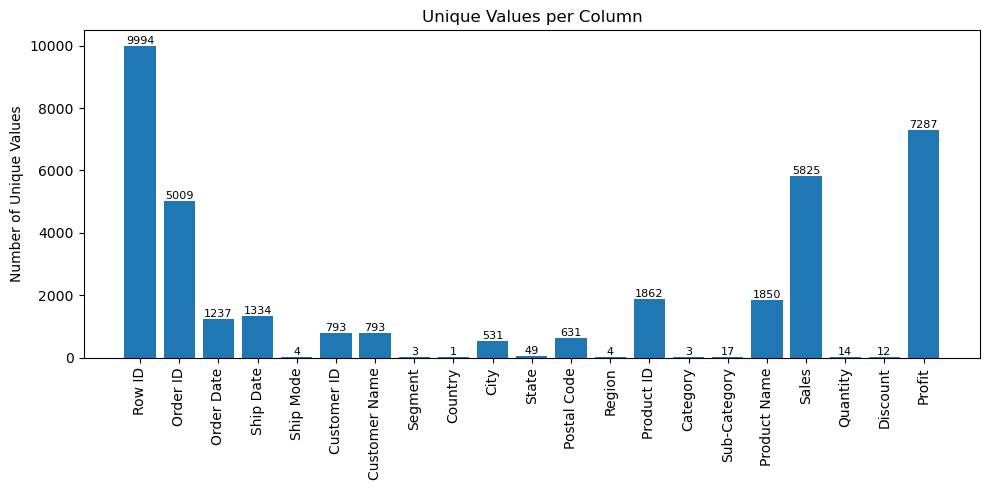

In [5]:
unique_counts = data.nunique()

plt.figure(figsize=(10, 5))
bars = plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Values")
plt.title("Unique Values per Column")

for i, v in enumerate(unique_counts.values):
    plt.text(
        i,   
        v,   
        str(v),
        ha='center',
        va='bottom',
        fontsize=8 
    )

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Số giá trị duy nhất của cột `Row ID` bằng với số dòng của dataset (9994) → không có dòng dữ liệu trùng.

- Số `Order_ID` chỉ có 5009 (chỉ có 5009 đơn hàng) mà số bản ghi của dữ liệu là 9994 → Đơn hàng bao gồm nhiều dòng dữ liệu và mỗi dòng mua từng sản phẩm khác nhau.

- Các cột giá trị phân loại như: `Ship mode`, `Segment`, `Region`, `Categoty` và `Sub-Category` có số giá trị duy nhất rất ít → có thể cân nhắc xử lí bằng các phương pháp như **One-hot encoding**, **Ordinal encoding**, ...

##  Phân tích cột dữ liệu số 

In [6]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("=" * 100)
print("PHÂN TÍCH CÁC CỘT DỮ LIỆU SỐ (NUMERICAL COLUMNS ANALYSIS)")
print("=" * 100)
print(f"\nCác cột số được xác định: {numerical_cols}")
print(f"Tổng số cột số: {len(numerical_cols)}")


PHÂN TÍCH CÁC CỘT DỮ LIỆU SỐ (NUMERICAL COLUMNS ANALYSIS)

Các cột số được xác định: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
Tổng số cột số: 6


### Nhận xét tổng quan về 6 thuộc tính số

**Row ID:** Chỉ là chỉ số tuần tự, không mang ý nghĩa phân tích, không có ngoại lệ hay giá trị bất thường.

**Postal Code:** Là mã bưu chính, thực chất là biến phân loại không dùng để tính toán, chuyển thành dạng chuỗi khi phân tích.

**Sales:** Phân phối lệch phải rõ rệt, phần lớn giao dịch có giá trị nhỏ, một số giao dịch rất lớn tạo ra ngoại lệ. Dữ liệu hợp lệ, nên chuẩn hóa bằng log transformation khi phân tích hoặc xây dựng mô hình.

**Quantity:** Đa số giao dịch mua số lượng nhỏ (1-2 sản phẩm), một số đơn hàng lớn là ngoại lệ hợp lý. Không có giá trị âm hay bằng 0, dữ liệu sạch và hợp lệ.

**Discount:** Hầu hết sản phẩm không được giảm giá, một số có mức giảm cao. Phân phối lệch phải, không có giá trị bất thường, nên cân nhắc tạo biến phân loại (có/không giảm giá) khi phân tích.

**Profit:** Phân phối lệch phải, đa số giao dịch có lợi nhuận nhỏ, một số rất cao hoặc lỗ lớn. Có ngoại lệ nhưng đều hợp lý với thực tế kinh doanh. Nên chuẩn hóa khi dùng cho mô hình dự báo.

### 1. Phân tích chi tiết - Sales

### 1.1. Distribution & Central Tendency - Sales

In [7]:
from scipy import stats

# Calculate distribution metrics for Sales
mean_sales = data['Sales'].mean()
median_sales = data['Sales'].median()
std_sales = data['Sales'].std()
skewness_sales = stats.skew(data['Sales'].dropna())
kurtosis_sales = stats.kurtosis(data['Sales'].dropna())

print("\n" + "=" * 100)
print("PHÂN TÍCH SALES - DISTRIBUTION & CENTRAL TENDENCY")
print("=" * 100)

print(f"\nTHỐNG KÊ CƠ BẢN:")
print(f"  Mean (Trung bình):       {mean_sales:>6,.2f}")
print(f"  Median (Trung vị):       {median_sales:>6,.2f}")
print(f"  Std Dev (Độ lệch):       {std_sales:>6,.2f}")
print(f"  Skewness (Độ xiên):      {skewness_sales:>6.4f}")
print(f"  Kurtosis (Độ nhọn):      {kurtosis_sales:>6.4f}")

print(f"\nPHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:")
if abs(skewness_sales) < 0.5:
    shape = "Gần đối xứng (Symmetric)"
elif skewness_sales > 0:
    shape = "Lệch phải (Right-skewed) - Có những giá trị Sales rất cao"
else:
    shape = "Lệch trái (Left-skewed) - Có những giá trị Sales rất thấp"
print(f"  Hình dáng: {shape}")
print(f"  Giải thích: Skewness = {skewness_sales:.4f}")



PHÂN TÍCH SALES - DISTRIBUTION & CENTRAL TENDENCY

THỐNG KÊ CƠ BẢN:
  Mean (Trung bình):       229.86
  Median (Trung vị):        54.49
  Std Dev (Độ lệch):       623.25
  Skewness (Độ xiên):      12.9708
  Kurtosis (Độ nhọn):      305.1584

PHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:
  Hình dáng: Lệch phải (Right-skewed) - Có những giá trị Sales rất cao
  Giải thích: Skewness = 12.9708


#### Trực quan hóa Sales

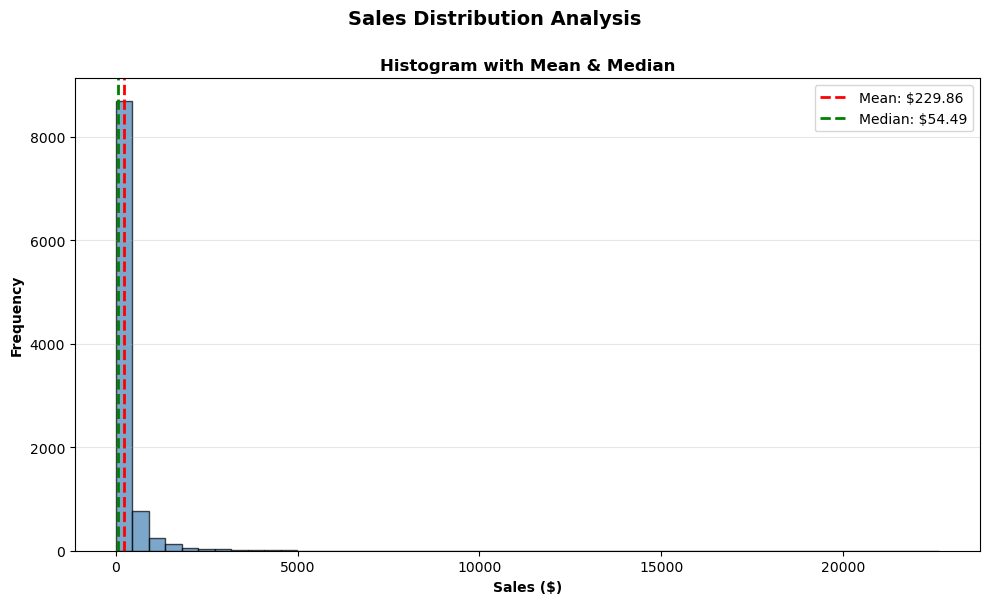

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Sales Distribution Analysis', fontsize=14, fontweight='bold', y=1.00)

# Histogram with mean/median
axes.hist(data['Sales'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_sales:.2f}')
axes.axvline(median_sales, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_sales:.2f}')
axes.set_xlabel('Sales ($)', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
axes.set_title('Histogram with Mean & Median', fontweight='bold')
axes.legend()
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Đồ thị hiển thị một sự tập trung cực kỳ cao của dữ liệu ở phía bên trái (gần giá trị 0). Phần lớn các thanh của histogram đều rất thấp, ngoại trừ thanh đầu tiên.
- Giá trị trung vị là $\$54.49$, còn giá trị trung bình là $\$229.86$ cao hơn rất nhiều so với giá trị trung vị, khẳng định rằng các giao dịch Sales có giá trị rất cao đã kéo giá trị trung bình lên đáng kể, trong khi hầu hết các giao dịch thực tế lại nằm ở mức thấp.

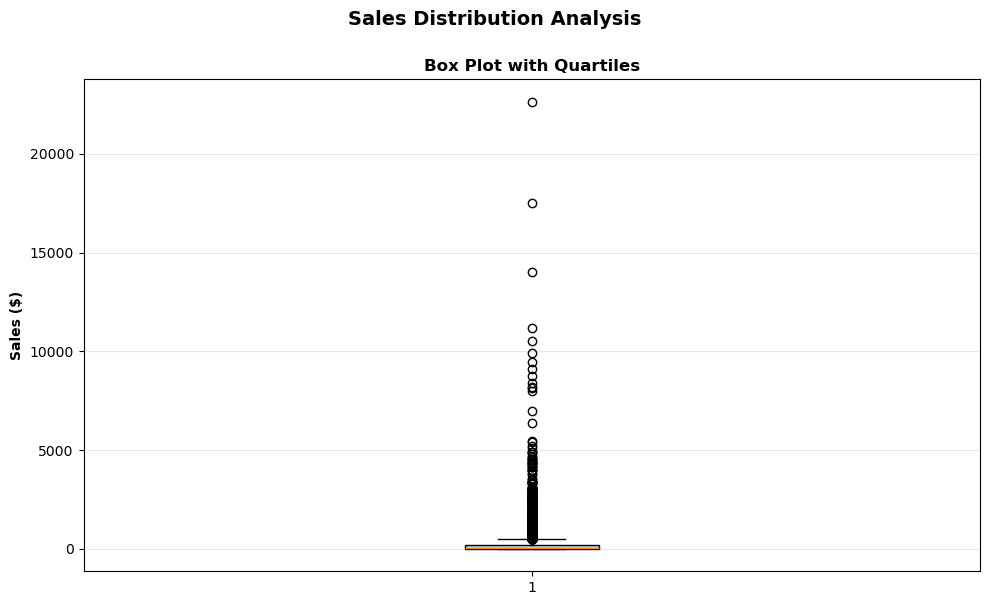

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Sales Distribution Analysis', fontsize=14, fontweight='bold', y=1.00)

# Box plot
bp = axes.boxplot(data['Sales'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes.set_ylabel('Sales ($)', fontweight='bold')
axes.set_title('Box Plot with Quartiles', fontweight='bold')
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

➡️ **Nhận xét**:

- Phần hộp (box) của biểu đồ hộp cực kỳ mỏng và dẹt, nằm rất gần trục \$0. Điều này cho thấy 75% dữ liệu Sales (từ Q1 đến Q3) chỉ nằm trong một phạm vi giá trị rất nhỏ và thấp.
- Phân phối có một lượng lớn các chấm tròn riêng biệt nằm phía trên phần râu (whisker) trên của biểu đồ, các chấm này đại diện cho Outliers (giá trị ngoại lai).

### 1.2. Range & Outliers - Sales

In [10]:
print("\n" + "=" * 100)
print("PHÂN TÍCH SALES - RANGE & OUTLIERS")
print("=" * 100)

# Basic range statistics
min_sales = data['Sales'].min()
max_sales = data['Sales'].max()
range_sales = max_sales - min_sales

print(f"\nPHẠM VI GIÁ TRỊ:")
print(f"  Min:                     {min_sales:>6,.2f}")
print(f"  Max:                     {max_sales:>6,.2f}")
print(f"  Range (Max-Min):         {range_sales:>6,.2f}")



PHÂN TÍCH SALES - RANGE & OUTLIERS

PHẠM VI GIÁ TRỊ:
  Min:                       0.44
  Max:                     22,638.48
  Range (Max-Min):         22,638.04


In [11]:

# IQR method for outliers
Q1_sales = data['Sales'].quantile(0.25)
Q3_sales = data['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

print(f"\nIQR METHOD:")
print(f"  Q1 (25th percentile):    ${Q1_sales:>14,.2f}")
print(f"  Q3 (75th percentile):    ${Q3_sales:>14,.2f}")
print(f"  IQR (Q3-Q1):             ${IQR_sales:>14,.2f}")
print(f"  Lower Bound (Q1-1.5×IQR):${lower_bound_sales:>14,.2f}")
print(f"  Upper Bound (Q3+1.5×IQR):${upper_bound_sales:>14,.2f}")

# Count outliers using IQR method
outliers_iqr_sales = ((data['Sales'] < lower_bound_sales) | (data['Sales'] > upper_bound_sales))
outlier_count_iqr_sales = outliers_iqr_sales.sum()
outlier_pct_iqr_sales = (outlier_count_iqr_sales / len(data)) * 100

print(f"\n  Số lượng outliers (IQR):  {outlier_count_iqr_sales:>10}")
print(f"  Tỷ lệ outliers:          {outlier_pct_iqr_sales:>10.2f}%")


IQR METHOD:
  Q1 (25th percentile):    $         17.28
  Q3 (75th percentile):    $        209.94
  IQR (Q3-Q1):             $        192.66
  Lower Bound (Q1-1.5×IQR):$       -271.71
  Upper Bound (Q3+1.5×IQR):$        498.93

  Số lượng outliers (IQR):        1167
  Tỷ lệ outliers:               11.68%


In [12]:
# Z-score method for outliers
z_scores_sales = np.abs(stats.zscore(data['Sales']))
outliers_zscore_sales = (z_scores_sales > 3).sum()
outlier_pct_zscore_sales = (outliers_zscore_sales / len(data)) * 100

print(f"\nZ-SCORE METHOD:")
print(f"  Outliers (|z| > 3):      {outliers_zscore_sales:>10}")
print(f"  Tỷ lệ outliers:          {outlier_pct_zscore_sales:>10.2f}%")


Z-SCORE METHOD:
  Outliers (|z| > 3):             127
  Tỷ lệ outliers:                1.27%


**Đánh giá**:

- Phương pháp IQR là phương pháp phù hợp và đáng tin cậy hơn để xác định các giá trị ngoại lai, mặc dù nó có thể đưa ra một ranh giới dưới (Upper Bound: $498.93$) có vẻ quá thấp. Phương pháp này cung cấp cái nhìn thực tế hơn về sự phân tán của phần lớn dữ liệu.

- Phương pháp Z-Score không phù hợp và dẫn đến kết quả đánh giá thấp số lượng outliers, do giả định phân phối chuẩn bị vi phạm nghiêm trọng.

### 1.3. Data Quality - Sales

In [13]:
print("\n" + "=" * 100)
print("PHÂN TÍCH SALES - DATA QUALITY")
print("=" * 100)

# Missing values
missing_count_sales = data['Sales'].isnull().sum()
missing_pct_sales = (missing_count_sales / len(data)) * 100

print(f"\nKIỂM TRA GIÁ TRỊ THIẾU:")
print(f"  Số giá trị thiếu:         {missing_count_sales:>10}")
print(f"  Tỷ lệ thiếu:             {missing_pct_sales:>10.2f}%")
if missing_count_sales == 0:
    print(f"  Tất cả dữ liệu đều có, không có giá trị bị thiếu")
else:
    print(f"  Cần xử lý {missing_count_sales} giá trị thiếu")

# Impossible values
print(f"\nKIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ:")

# Negative values
negative_sales = (data['Sales'] < 0).sum()
print(f"  Giá trị âm:               {negative_sales:>10}")
if negative_sales > 0:
    print(f"    Có {negative_sales} giá trị âm (có thể là hoàn trả/hủy đơn)")
    print(f"    Danh sách giá trị âm:")
    negative_sales_list = data[data['Sales'] < 0][['Order ID', 'Sales', 'Product Name']].head(10)
    print(f"    {negative_sales_list.to_string()}")
else:
    print(f"    Không có giá trị âm")

# Zero values
zero_sales = (data['Sales'] == 0).sum()
print(f"  Giá trị bằng 0:           {zero_sales:>10}")
if zero_sales > 0:
    print(f"    Có {zero_sales} giá trị = 0 (có thể là dữ liệu bất thường)")
else:
    print(f"    Không có giá trị = 0")

# Very small values
small_sales = (data['Sales'] < 1).sum()
if small_sales > 0:
    print(f"  Giá trị < $1:             {small_sales:>10}")
    print(f"    Nhỏ nhất (exclude 0):   ${data[data['Sales'] > 0]['Sales'].min():.4f}")

# Placeholder values
print(f"\nKIỂM TRA GIÁ TRỊ ĐẶC BIỆT:")
placeholders_sales = [999, -1, -999, 0]
placeholder_found_sales = False
for val in placeholders_sales:
    count = (data['Sales'] == val).sum()
    if count > 0:
        print(f"  Giá trị {val}: {count} (dùng làm placeholder?)")
        placeholder_found_sales = True

if not placeholder_found_sales:
    print(f"  Không tìm thấy giá trị đặc biệt (999, -1, -999, etc.)")



PHÂN TÍCH SALES - DATA QUALITY

KIỂM TRA GIÁ TRỊ THIẾU:
  Số giá trị thiếu:                  0
  Tỷ lệ thiếu:                   0.00%
  Tất cả dữ liệu đều có, không có giá trị bị thiếu

KIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ:
  Giá trị âm:                        0
    Không có giá trị âm
  Giá trị bằng 0:                    0
    Không có giá trị = 0
  Giá trị < $1:                      8
    Nhỏ nhất (exclude 0):   $0.4440

KIỂM TRA GIÁ TRỊ ĐẶC BIỆT:
  Không tìm thấy giá trị đặc biệt (999, -1, -999, etc.)


### 2. Phân tích chi tiết - Quantity

### 2.1. Distribution & Central Tendency - Quantity

In [14]:
# Calculate distribution metrics for Quantity
mean_quantity = data['Quantity'].mean()
median_quantity = data['Quantity'].median()
std_quantity = data['Quantity'].std()
skewness_quantity = stats.skew(data['Quantity'].dropna())
kurtosis_quantity = stats.kurtosis(data['Quantity'].dropna())

print("\n" + "=" * 100)
print("PHÂN TÍCH QUANTITY - DISTRIBUTION & CENTRAL TENDENCY")
print("=" * 100)

print(f"\nTHỐNG KÊ CƠ BẢN:")
print(f"  Mean (Trung bình):       {mean_quantity:>14.2f} units")
print(f"  Median (Trung vị):       {median_quantity:>14.2f} units")
print(f"  Std Dev (Độ lệch):       {std_quantity:>14.2f} units")
print(f"  Skewness (Độ xiên):      {skewness_quantity:>16.4f}")
print(f"  Kurtosis (Độ nhọn):      {kurtosis_quantity:>16.4f}")

print(f"\nPHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:")
if abs(skewness_quantity) < 0.5:
    shape = "Gần đối xứng (Symmetric)"
elif skewness_quantity > 0:
    shape = "Lệch phải (Right-skewed) - Có những đơn hàng mua số lượng rất lớn"
else:
    shape = "Lệch trái (Left-skewed) - Có những đơn hàng mua số lượng rất nhỏ"
print(f"  Hình dáng: {shape}")
print(f"  Giải thích: Skewness = {skewness_quantity:.4f}")



PHÂN TÍCH QUANTITY - DISTRIBUTION & CENTRAL TENDENCY

THỐNG KÊ CƠ BẢN:
  Mean (Trung bình):                 3.79 units
  Median (Trung vị):                 3.00 units
  Std Dev (Độ lệch):                 2.23 units
  Skewness (Độ xiên):                1.2784
  Kurtosis (Độ nhọn):                1.9903

PHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:
  Hình dáng: Lệch phải (Right-skewed) - Có những đơn hàng mua số lượng rất lớn
  Giải thích: Skewness = 1.2784


#### Trực quan hóa Quantity

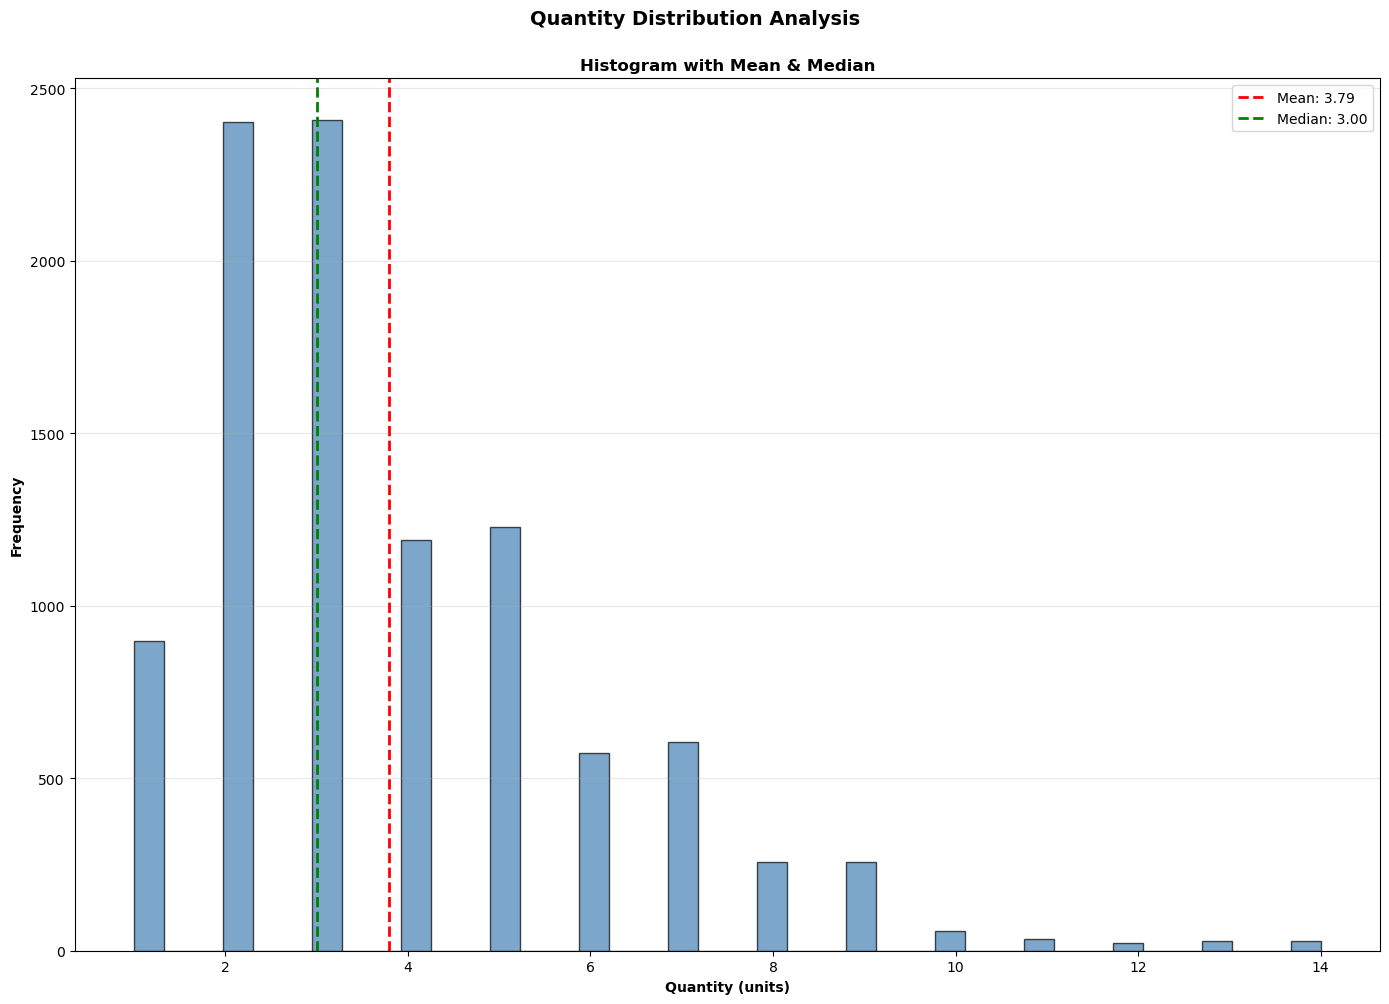

In [15]:
fig, axes = plt.subplots(figsize=(14, 10))
fig.suptitle('Quantity Distribution Analysis', fontsize=14, fontweight='bold', y=1.00)

# Histogram with mean/median
axes.hist(data['Quantity'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes.axvline(mean_quantity, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_quantity:.2f}')
axes.axvline(median_quantity, color='green', linestyle='--', linewidth=2, label=f'Median: {median_quantity:.2f}')
axes.set_xlabel('Quantity (units)', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
axes.set_title('Histogram with Mean & Median', fontweight='bold')
axes.legend()
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


➡️ **Nhận xét**:

- Phần lớn các thanh (bins) tập trung ở phía bên trái của biểu đồ (các giá trị Số lượng thấp, từ 1 đến 5 đơn vị). Sau đó, tần suất giảm dần và có một "đuôi" kéo dài về phía bên phải
- Giá trị Trung bình ($3.79$) cao hơn Trung vị ($3.00$). Điều này chứng tỏ một số đơn hàng mua số lượng rất lớn đã kéo giá trị trung bình tổng thể lên.
- Biểu đồ cho thấy có hai đỉnh rõ rệt ở các giá trị Số lượng nhỏ, cụ thể là tại 2 và 3 đơn vị (với tần suất cao nhất, gần 2500). Điều này có nghĩa là số lượng mua phổ biến nhất là 2 hoặc 3 đơn vị.

### 2.2. Range & Outliers - Quantity

In [16]:
print("\n" + "=" * 100)
print("PHÂN TÍCH QUANTITY - RANGE & OUTLIERS")
print("=" * 100)

# Basic range statistics
min_quantity = data['Quantity'].min()
max_quantity = data['Quantity'].max()
range_quantity = max_quantity - min_quantity

print(f"\nPHẠM VI GIÁ TRỊ:")
print(f"  Min:                     {min_quantity:>14} units")
print(f"  Max:                     {max_quantity:>14} units")
print(f"  Range (Max-Min):         {range_quantity:>14} units")

# IQR method for outliers
Q1_quantity = data['Quantity'].quantile(0.25)
Q3_quantity = data['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

print(f"\nIQR METHOD:")
print(f"  Q1 (25th percentile):    {Q1_quantity:>14.2f}")
print(f"  Q3 (75th percentile):    {Q3_quantity:>14.2f}")
print(f"  IQR (Q3-Q1):             {IQR_quantity:>14.2f}")
print(f"  Lower Bound (Q1-1.5×IQR):{lower_bound_quantity:>14.2f}")
print(f"  Upper Bound (Q3+1.5×IQR):{upper_bound_quantity:>14.2f}")

# Count outliers using IQR method
outliers_iqr_quantity = ((data['Quantity'] < lower_bound_quantity) | (data['Quantity'] > upper_bound_quantity))
outlier_count_iqr_quantity = outliers_iqr_quantity.sum()
outlier_pct_iqr_quantity = (outlier_count_iqr_quantity / len(data)) * 100

print(f"\n  Số lượng outliers (IQR):  {outlier_count_iqr_quantity:>10}")
print(f"  Tỷ lệ outliers:          {outlier_pct_iqr_quantity:>10.2f}%")

if outlier_count_iqr_quantity > 0:
    outliers_iqr_data_qty = data[outliers_iqr_quantity][['Order ID', 'Quantity', 'Sales', 'Profit']]



PHÂN TÍCH QUANTITY - RANGE & OUTLIERS

PHẠM VI GIÁ TRỊ:
  Min:                                  1 units
  Max:                                 14 units
  Range (Max-Min):                     13 units

IQR METHOD:
  Q1 (25th percentile):              2.00
  Q3 (75th percentile):              5.00
  IQR (Q3-Q1):                       3.00
  Lower Bound (Q1-1.5×IQR):         -2.50
  Upper Bound (Q3+1.5×IQR):          9.50

  Số lượng outliers (IQR):         170
  Tỷ lệ outliers:                1.70%


In [17]:
# Z-score method for outliers
z_scores_quantity = np.abs(stats.zscore(data['Quantity']))
outliers_zscore_quantity = (z_scores_quantity > 3).sum()
outlier_pct_zscore_quantity = (outliers_zscore_quantity / len(data)) * 100

print(f"\n Z-SCORE METHOD:")
print(f"  Outliers (|z| > 3):      {outliers_zscore_quantity:>10}")
print(f"  Tỷ lệ outliers:          {outlier_pct_zscore_quantity:>10.2f}%")


 Z-SCORE METHOD:
  Outliers (|z| > 3):             113
  Tỷ lệ outliers:                1.13%


### 2.3. Data Quality - Quantity

In [18]:
print("\n" + "=" * 100)
print("PHÂN TÍCH QUANTITY - DATA QUALITY")
print("=" * 100)

# Missing values
missing_count_quantity = data['Quantity'].isnull().sum()
missing_pct_quantity = (missing_count_quantity / len(data)) * 100

print(f"\nKIỂM TRA GIÁ TRỊ THIẾU (MISSING VALUES):")
print(f"  Số giá trị thiếu:         {missing_count_quantity:>10}")
print(f"  Tỷ lệ thiếu:             {missing_pct_quantity:>10.2f}%")
if missing_count_quantity == 0:
    print(f"  Tất cả dữ liệu đều có, không có giá trị bị thiếu")
else:
    print(f"  Cần xử lý {missing_count_quantity} giá trị thiếu")

# Impossible values
print(f"\nKIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ (IMPOSSIBLE VALUES):")

# Negative values
negative_quantity = (data['Quantity'] < 0).sum()
print(f"  Giá trị âm:               {negative_quantity:>10}")
if negative_quantity > 0:
    print(f"    Có {negative_quantity} giá trị âm (không hợp lý)")
else:
    print(f"    Không có giá trị âm")

# Zero values
zero_quantity = (data['Quantity'] == 0).sum()
print(f"  Giá trị bằng 0:           {zero_quantity:>10}")
if zero_quantity > 0:
    print(f"    Có {zero_quantity} giá trị = 0 (không hợp lý)")
else:
    print(f"    Không có giá trị = 0")

# Fractional values (should be integers)
fractional_qty = (data['Quantity'] != data['Quantity'].astype(int)).sum()
print(f"  Giá trị thập phân:        {fractional_qty:>10}")
if fractional_qty > 0:
    print(f"    Có {fractional_qty} giá trị thập phân (nên là số nguyên)")
else:
    print(f"    Tất cả giá trị đều là số nguyên")

# Placeholder values
print(f"\nKIỂM TRA GIÁ TRỊ ĐẶC BIỆT (PLACEHOLDER VALUES):")
placeholders_qty = [999, -1, -999, 0]
placeholder_found_qty = False
for val in placeholders_qty:
    count = (data['Quantity'] == val).sum()
    if count > 0:
        print(f"  Giá trị {val}: {count} (dùng làm placeholder?)")
        placeholder_found_qty = True

if not placeholder_found_qty:
    print(f"  Không tìm thấy giá trị đặc biệt (999, -1, -999, etc.)")



PHÂN TÍCH QUANTITY - DATA QUALITY

KIỂM TRA GIÁ TRỊ THIẾU (MISSING VALUES):
  Số giá trị thiếu:                  0
  Tỷ lệ thiếu:                   0.00%
  Tất cả dữ liệu đều có, không có giá trị bị thiếu

KIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ (IMPOSSIBLE VALUES):
  Giá trị âm:                        0
    Không có giá trị âm
  Giá trị bằng 0:                    0
    Không có giá trị = 0
  Giá trị thập phân:                 0
    Tất cả giá trị đều là số nguyên

KIỂM TRA GIÁ TRỊ ĐẶC BIỆT (PLACEHOLDER VALUES):
  Không tìm thấy giá trị đặc biệt (999, -1, -999, etc.)


### 3. Phân tích chi tiết - Discount

### 3.1. Distribution & Central Tendency - Discount

In [19]:
# Calculate distribution metrics for Discount
mean_discount = data['Discount'].mean()
median_discount = data['Discount'].median()
std_discount = data['Discount'].std()
skewness_discount = stats.skew(data['Discount'].dropna())
kurtosis_discount = stats.kurtosis(data['Discount'].dropna())

print("\n" + "=" * 100)
print("PHÂN TÍCH DISCOUNT - DISTRIBUTION & CENTRAL TENDENCY")
print("=" * 100)

print(f"\nTHỐNG KÊ CƠ BẢN:")
print(f"  Mean (Trung bình):       {mean_discount:>14.4f}")
print(f"  Median (Trung vị):       {median_discount:>14.4f}")
print(f"  Std Dev (Độ lệch):       {std_discount:>14.4f}")
print(f"  Skewness (Độ xiên):      {skewness_discount:>16.4f}")
print(f"  Kurtosis (Độ nhọn):      {kurtosis_discount:>16.4f}")

print(f"\nPHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:")
if abs(skewness_discount) < 0.5:
    shape = "Gần đối xứng (Symmetric)"
elif skewness_discount > 0:
    shape = "Lệch phải (Right-skewed) - Có nhiều sản phẩm được giảm giá cao"
else:
    shape = "Lệch trái (Left-skewed) - Đa số sản phẩm không có hoặc giảm giá thấp"
print(f"  Hình dáng: {shape}")
print(f"  Giải thích: Skewness = {skewness_discount:.4f}")


PHÂN TÍCH DISCOUNT - DISTRIBUTION & CENTRAL TENDENCY

THỐNG KÊ CƠ BẢN:
  Mean (Trung bình):               0.1562
  Median (Trung vị):               0.2000
  Std Dev (Độ lệch):               0.2065
  Skewness (Độ xiên):                1.6840
  Kurtosis (Độ nhọn):                2.4077

PHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:
  Hình dáng: Lệch phải (Right-skewed) - Có nhiều sản phẩm được giảm giá cao
  Giải thích: Skewness = 1.6840


#### Trực quan hóa Discount

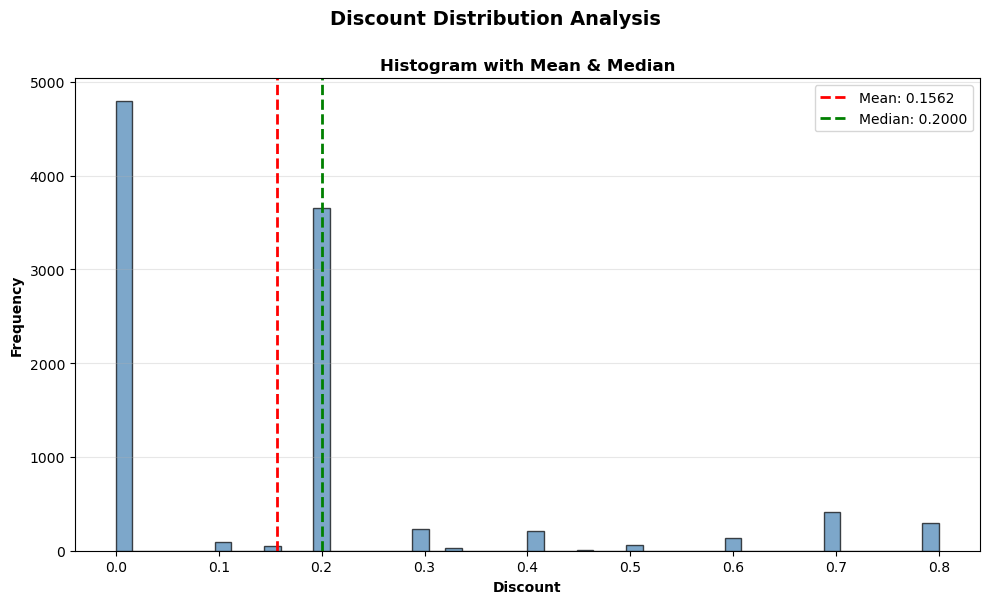

In [20]:
fig, axes = plt.subplots(figsize=(10, 6))
fig.suptitle('Discount Distribution Analysis', fontsize=14, fontweight='bold', y=1.00)

# Histogram with mean/median
axes.hist(data['Discount'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes.axvline(mean_discount, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_discount:.4f}')
axes.axvline(median_discount, color='green', linestyle='--', linewidth=2, label=f'Median: {median_discount:.4f}')
axes.set_xlabel('Discount', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
axes.set_title('Histogram with Mean & Median', fontweight='bold')
axes.legend()
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

➡️ **Nhận xét**:

- Mức giảm giá được áp dụng tập trung mạnh vào hai kịch bản chính: Không giảm giá ($0\%$) và Giảm giá $20\%$.
- Trung bình 0.1562 cho biết mức giảm giá trung bình là khoảng 15.6%, nhưng Trung vị 20% cung cấp cái nhìn tốt hơn về mức giảm giá mà một giao dịch có khả năng nhận được (hoặc 0% hoặc 20%).

### 3.2. Range & Outliers - Discount

In [21]:
print("\n" + "=" * 100)
print("PHÂN TÍCH DISCOUNT - RANGE & OUTLIERS")
print("=" * 100)

# Basic range statistics
min_discount = data['Discount'].min()
max_discount = data['Discount'].max()
range_discount = max_discount - min_discount

print(f"\nPHẠM VI GIÁ TRỊ:")
print(f"  Min:                     {min_discount:>14.4f}")
print(f"  Max:                     {max_discount:>14.4f}")
print(f"  Range (Max-Min):         {range_discount:>14.4f}")

# IQR method for outliers
Q1_discount = data['Discount'].quantile(0.25)
Q3_discount = data['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
lower_bound_discount = Q1_discount - 1.5 * IQR_discount
upper_bound_discount = Q3_discount + 1.5 * IQR_discount

print(f"\nIQR METHOD:")
print(f"  Q1 (25th percentile):    {Q1_discount:>14.4f}")
print(f"  Q3 (75th percentile):    {Q3_discount:>14.4f}")
print(f"  IQR (Q3-Q1):             {IQR_discount:>14.4f}")
print(f"  Lower Bound (Q1-1.5×IQR):{lower_bound_discount:>14.4f}")
print(f"  Upper Bound (Q3+1.5×IQR):{upper_bound_discount:>14.4f}")

# Count outliers using IQR method
outliers_iqr_discount = ((data['Discount'] < lower_bound_discount) | (data['Discount'] > upper_bound_discount))
outlier_count_iqr_discount = outliers_iqr_discount.sum()
outlier_pct_iqr_discount = (outlier_count_iqr_discount / len(data)) * 100

print(f"\n  Số lượng outliers (IQR):  {outlier_count_iqr_discount:>10}")
print(f"  Tỷ lệ outliers:          {outlier_pct_iqr_discount:>10.2f}%")

if outlier_count_iqr_discount > 0:
    print(f"  → Các giảm giá cao này ({upper_bound_discount:.4f} trở lên) là ngoại lệ")
    print(f"  → Thường là các chiến dịch khuyến mãi đặc biệt")



PHÂN TÍCH DISCOUNT - RANGE & OUTLIERS

PHẠM VI GIÁ TRỊ:
  Min:                             0.0000
  Max:                             0.8000
  Range (Max-Min):                 0.8000

IQR METHOD:
  Q1 (25th percentile):            0.0000
  Q3 (75th percentile):            0.2000
  IQR (Q3-Q1):                     0.2000
  Lower Bound (Q1-1.5×IQR):       -0.3000
  Upper Bound (Q3+1.5×IQR):        0.5000

  Số lượng outliers (IQR):         856
  Tỷ lệ outliers:                8.57%
  → Các giảm giá cao này (0.5000 trở lên) là ngoại lệ
  → Thường là các chiến dịch khuyến mãi đặc biệt


### 3.3. Data Quality - Discount

In [22]:
print("\n" + "=" * 100)
print("PHÂN TÍCH DISCOUNT - DATA QUALITY")
print("=" * 100)

# Missing values
missing_count_discount = data['Discount'].isnull().sum()
missing_pct_discount = (missing_count_discount / len(data)) * 100

print(f"\nKIỂM TRA GIÁ TRỊ THIẾU:")
print(f"  Số giá trị thiếu:         {missing_count_discount:>10}")
print(f"  Tỷ lệ thiếu:             {missing_pct_discount:>10.2f}%")
if missing_count_discount == 0:
    print(f" Tất cả dữ liệu đều có, không có giá trị bị thiếu")
else:
    print(f"  Cần xử lý {missing_count_discount} giá trị thiếu")

# Impossible values
print(f"\n KIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ (IMPOSSIBLE VALUES):")

# Negative values
negative_discount = (data['Discount'] < 0).sum()
print(f"  Giá trị âm:               {negative_discount:>10}")
if negative_discount > 0:
    print(f"    Có {negative_discount} giá trị âm (không hợp lý)")
else:
    print(f"   Không có giá trị âm")

# Values > 1 (discount should be 0-1)
over_one = (data['Discount'] > 1).sum()
print(f"  Giá trị > 1 (>100%):      {over_one:>10}")
if over_one > 0:
    print(f"    Có {over_one} giá trị > 1 (không hợp lý, phải ≤ 100%)")
    over_one_vals = data[data['Discount'] > 1]['Discount'].unique()
    print(f"    Giá trị: {sorted(over_one_vals)}")
else:
    print(f"   Tất cả giá trị ≤ 1 (≤100%)")

# Placeholder values
print(f"\n KIỂM TRA GIÁ TRỊ ĐẶC BIỆT (PLACEHOLDER VALUES):")
placeholders_disc = [999, -1, -999, -0.5]
placeholder_found_disc = False
for val in placeholders_disc:
    count = (data['Discount'] == val).sum()
    if count > 0:
        print(f"  Giá trị {val}: {count} (dùng làm placeholder?)")
        placeholder_found_disc = True

if not placeholder_found_disc:
    print(f" Không tìm thấy giá trị đặc biệt")



PHÂN TÍCH DISCOUNT - DATA QUALITY

KIỂM TRA GIÁ TRỊ THIẾU:
  Số giá trị thiếu:                  0
  Tỷ lệ thiếu:                   0.00%
 Tất cả dữ liệu đều có, không có giá trị bị thiếu

 KIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ (IMPOSSIBLE VALUES):
  Giá trị âm:                        0
   Không có giá trị âm
  Giá trị > 1 (>100%):               0
   Tất cả giá trị ≤ 1 (≤100%)

 KIỂM TRA GIÁ TRỊ ĐẶC BIỆT (PLACEHOLDER VALUES):
 Không tìm thấy giá trị đặc biệt


In [23]:
# Decimal precision
print(f"\nKIỂM TRA ĐỘ CHÍNH XÁC:")
print(f"  Giá trị duy nhất:         {data['Discount'].nunique():>10}")
discount_value_counts = data['Discount'].value_counts().sort_index()
print(f"  Top 10 giá trị phổ biến:")
for val, count in discount_value_counts.head(10).items():
    pct = (count / len(data)) * 100
    print(f"    {val:.1%}: {count:>5} lần ({pct:>5.2f}%)")

# Distribution consistency
print(f"\nPHÂN TÍCH TÍNH HỢP LỆ:")
print(f"  Giá trị hợp lệ [0, 1]:    {(data['Discount'] >= 0).sum() & (data['Discount'] <= 1).sum():>10}")
valid_range = ((data['Discount'] >= 0) & (data['Discount'] <= 1)).sum()
valid_pct = (valid_range / len(data)) * 100
print(f"  Tỷ lệ hợp lệ:             {valid_pct:>10.2f}%")


KIỂM TRA ĐỘ CHÍNH XÁC:
  Giá trị duy nhất:                 12
  Top 10 giá trị phổ biến:
    0.0%:  4798 lần (48.01%)
    10.0%:    94 lần ( 0.94%)
    15.0%:    52 lần ( 0.52%)
    20.0%:  3657 lần (36.59%)
    30.0%:   227 lần ( 2.27%)
    32.0%:    27 lần ( 0.27%)
    40.0%:   206 lần ( 2.06%)
    45.0%:    11 lần ( 0.11%)
    50.0%:    66 lần ( 0.66%)
    60.0%:   138 lần ( 1.38%)

PHÂN TÍCH TÍNH HỢP LỆ:
  Giá trị hợp lệ [0, 1]:          9994
  Tỷ lệ hợp lệ:                 100.00%


### 4. Phân tích chi tiết - Profit

### 4.1. Distribution & Central Tendency - Profit

In [24]:
print("="*100)
print("PHÂN TÍCH PROFIT - DISTRIBUTION & CENTRAL TENDENCY")
print("="*100)

mean_profit = data['Profit'].mean()
median_profit = data['Profit'].median()
std_profit = data['Profit'].std()
skewness_profit = stats.skew(data['Profit'].dropna())
kurtosis_profit = stats.kurtosis(data['Profit'].dropna())

print("\nTHỐNG KÊ CƠ BẢN:")
print(f"  Mean (Trung bình):               ${mean_profit:,.2f}")
print(f"  Median (Trung vị):               ${median_profit:,.2f}")
print(f"  Std Dev (Độ lệch):               ${std_profit:,.2f}")
print(f"  Skewness (Độ xiên):                {skewness_profit:.4f}")
print(f"  Kurtosis (Độ nhọn):                {kurtosis_profit:.4f}")

# Phân loại lợi nhuận
loss_products = (data['Profit'] < 0).sum()
breakeven_products = (data['Profit'] == 0).sum()
low_profit = ((data['Profit'] > 0) & (data['Profit'] <= 50)).sum()
medium_profit = ((data['Profit'] > 50) & (data['Profit'] <= 500)).sum()
high_profit = (data['Profit'] > 500).sum()

print("\nPHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:")
if skewness_profit > 0.5:
    dist_type = "Lệch phải (Right-skewed) - Có các đơn hàng lợi nhuận cao"
elif skewness_profit < -0.5:
    dist_type = "Lệch trái (Left-skewed) - Nhiều sản phẩm lỗ hoặc lợi nhuận thấp"
else:
    dist_type = "Gần đối xứng (Symmetric)"
print(f"  Hình dáng: {dist_type}")
print(f"  Giải thích: Skewness = {skewness_profit:.4f}")

PHÂN TÍCH PROFIT - DISTRIBUTION & CENTRAL TENDENCY

THỐNG KÊ CƠ BẢN:
  Mean (Trung bình):               $28.66
  Median (Trung vị):               $8.67
  Std Dev (Độ lệch):               $234.26
  Skewness (Độ xiên):                7.5603
  Kurtosis (Độ nhọn):                396.9892

PHÂN TÍCH HÌNH DÁNG PHÂN PHỐI:
  Hình dáng: Lệch phải (Right-skewed) - Có các đơn hàng lợi nhuận cao
  Giải thích: Skewness = 7.5603


### Trực quan hóa Profit

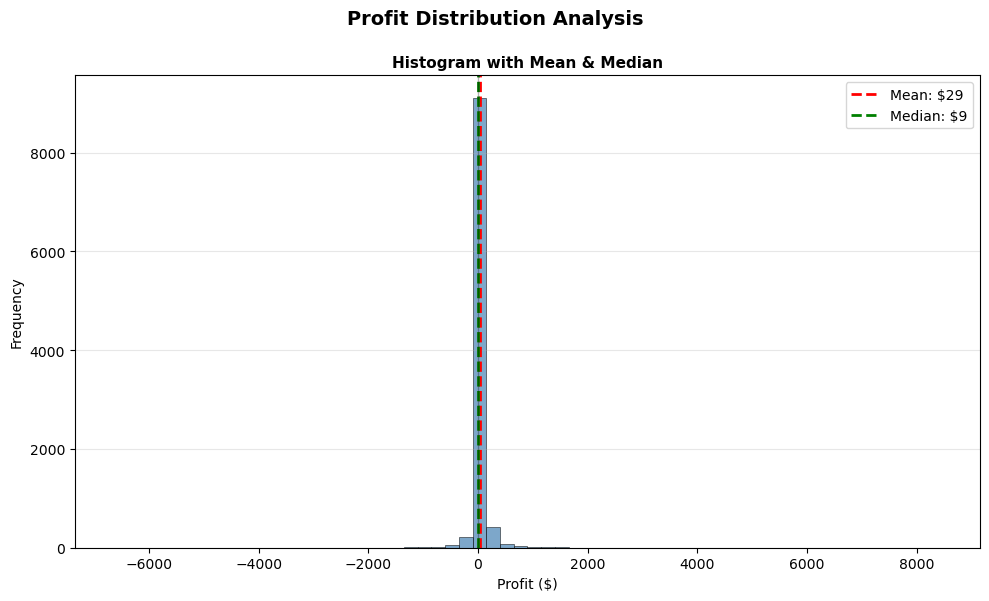

In [25]:
fig, axes = plt.subplots(figsize=(10, 6))
fig.suptitle('Profit Distribution Analysis', fontsize=14, fontweight='bold', y=0.995)

axes.hist(data['Profit'], bins=60, color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)
axes.axvline(mean_profit, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_profit:,.0f}')
axes.axvline(median_profit, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_profit:,.0f}')
axes.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.3)
axes.set_xlabel('Profit ($)', fontsize=10)
axes.set_ylabel('Frequency', fontsize=10)
axes.set_title('Histogram with Mean & Median', fontsize=11, fontweight='bold')
axes.legend()
axes.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


➡️ **Nhận xét**:

- Phần lớn dữ liệu tập trung xung quanh giá trị Lợi nhuận thấp. Sau đó, đồ thị có một "đuôi" dài kéo rất xa về phía bên phải (lợi nhuận dương, lên đến hơn $\$8,000$) và một đuôi nhỏ hơn kéo về bên trái (lợi nhuận âm/lỗ, xuống đến $\$6,000$).
- Các giao dịch có lợi nhuận rất cao đã kéo giá trị trung bình lên đáng kể, trong khi hầu hết các giao dịch thực tế lại mang lại lợi nhuận thấp.
- Sự hiện diện của các giá trị âm (lỗ) và độ lệch chuẩn cao cho thấy rủi ro đáng kể trong các giao dịch.

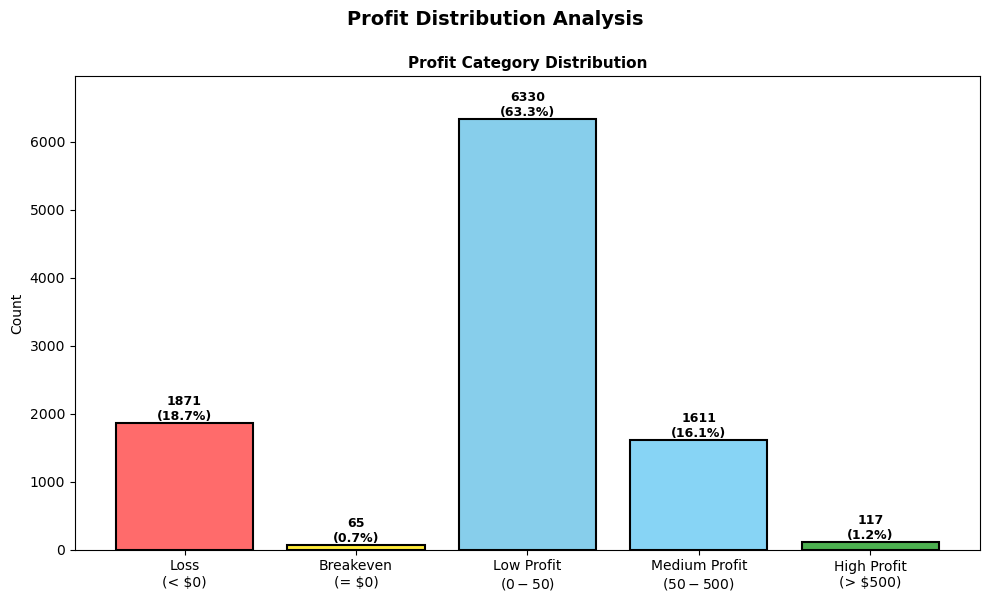

In [26]:
fig, axes = plt.subplots(figsize=(10, 6))
fig.suptitle('Profit Distribution Analysis', fontsize=14, fontweight='bold', y=0.995)

categories = ['Loss\n(< $0)', 'Breakeven\n(= $0)', 'Low Profit\n($0-$50)', 'Medium Profit\n($50-$500)', 'High Profit\n(> $500)']
counts = [loss_products, breakeven_products, low_profit, medium_profit, high_profit]
colors_profit = ['#ff6b6b', '#ffeb3b', '#87ceeb', '#87d4f5', '#4CAF50']
bars = axes.bar(categories, counts, color=colors_profit, edgecolor='black', linewidth=1.5)
axes.set_ylabel('Count', fontsize=10)
axes.set_title('Profit Category Distribution', fontsize=11, fontweight='bold')
axes.set_ylim(0, max(counts) * 1.1)
for bar, count in zip(bars, counts):
    height = bar.get_height()
    pct = count/len(data)*100
    axes.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

➡️ **Nhận xét**:
- Danh mục Low Profit ($0 - \$50$) chiếm $\mathbf{63.3\%}$ tổng số giao dịch. Điều này khẳng định nhận xét từ Histogram rằng lợi nhuận điển hình cho một giao dịch là rất thấp (Median $\approx \$9$), và phần lớn doanh số bán hàng được tạo ra bởi các giao dịch có lợi nhuận khiêm tốn.  
- Danh mục Loss ($< \$0$) chiếm $\mathbf{18.7\%}$ tổng số giao dịch, gần 1 trong 5 giao dịch là lỗ. Đây là một tỷ lệ rủi ro đáng kể, cho thấy cần phải phân tích sâu hơn nguyên nhân gây lỗ (ví dụ: chi phí vận chuyển cao, giảm giá quá mức, hoặc chi phí thu hồi hàng).

### 4.2. Range & Outliers - Profit

In [27]:
print("="*100)
print("PHÂN TÍCH PROFIT - DATA QUALITY")
print("="*100)

# Missing values check
missing_count_profit = data['Profit'].isna().sum()
missing_pct_profit = missing_count_profit / len(data) * 100

print("\KIỂM TRA GIÁ TRỊ THIẾU:")
print(f"  Số giá trị thiếu:                  {missing_count_profit}")
print(f"  Tỷ lệ thiếu:                   {missing_pct_profit:.2f}%")
if missing_count_profit == 0:
    print(f"  Tất cả dữ liệu đều có, không có giá trị bị thiếu")
else:
    print(f"  Có giá trị bị thiếu cần xử lý")

# Impossible values check
negative_profit = (data['Profit'] < 0).sum()

print("\nKIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ:")
print(f"  Giá trị âm (lỗ):                   {negative_profit}")
if negative_profit > 0:
    print(f"    {negative_profit} sản phẩm có lỗ (hợp lệ - hoàn trả/sản phẩm lỗ thực tế)")
    neg_profit_detail = data[data['Profit'] < 0]['Profit'].describe()
    print(f"      Lỗ nhẹ nhất: ${data[data['Profit'] < 0]['Profit'].max():,.2f}")
    print(f"      Lỗ nặng nhất: ${data[data['Profit'] < 0]['Profit'].min():,.2f}")
else:
    print(f"    Không có giá trị âm")

# Placeholder values check
placeholders_profit = [999, -1, -999, -999.99]
placeholder_found_profit = False
placeholder_list = []

for val in placeholders_profit:
    if (data['Profit'] == val).sum() > 0:
        placeholder_found_profit = True
        placeholder_list.append(val)

print("\n KIỂM TRA GIÁ TRỊ ĐẶC BIỆT:")
if placeholder_found_profit:
    print(f"  Tìm thấy giá trị đặc biệt: {placeholder_list}")
else:
    print(f"  Không tìm thấy giá trị đặc biệt")

PHÂN TÍCH PROFIT - DATA QUALITY
\KIỂM TRA GIÁ TRỊ THIẾU:
  Số giá trị thiếu:                  0
  Tỷ lệ thiếu:                   0.00%
  Tất cả dữ liệu đều có, không có giá trị bị thiếu

KIỂM TRA GIÁ TRỊ KHÔNG HỢP LỆ:
  Giá trị âm (lỗ):                   1871
    1871 sản phẩm có lỗ (hợp lệ - hoàn trả/sản phẩm lỗ thực tế)
      Lỗ nhẹ nhất: $-0.09
      Lỗ nặng nhất: $-6,599.98

 KIỂM TRA GIÁ TRỊ ĐẶC BIỆT:
  Không tìm thấy giá trị đặc biệt


### 4.3. Data Quality - Profit

In [28]:
print("="*100)
print("PHÂN TÍCH PROFIT - RANGE & OUTLIERS")
print("="*100)

# Range calculations
min_profit = data['Profit'].min()
max_profit = data['Profit'].max()
range_profit = max_profit - min_profit

print("\nPHẠM VI GIÁ TRỊ:")
print(f"  Min:                             ${min_profit:,.2f}")
print(f"  Max:                             ${max_profit:,.2f}")
print(f"  Range (Max-Min):                 ${range_profit:,.2f}")

# IQR Method
q1_profit = data['Profit'].quantile(0.25)
q3_profit = data['Profit'].quantile(0.75)
iqr_profit = q3_profit - q1_profit
lower_bound_profit = q1_profit - 1.5 * iqr_profit
upper_bound_profit = q3_profit + 1.5 * iqr_profit

outliers_iqr_profit = data[(data['Profit'] < lower_bound_profit) | (data['Profit'] > upper_bound_profit)]
outlier_count_iqr_profit = len(outliers_iqr_profit)
outlier_pct_iqr_profit = outlier_count_iqr_profit / len(data) * 100

print("\nIQR METHOD:")
print(f"  Q1 (25th percentile):            ${q1_profit:,.2f}")
print(f"  Q3 (75th percentile):            ${q3_profit:,.2f}")
print(f"  IQR (Q3-Q1):                     ${iqr_profit:,.2f}")
print(f"  Lower Bound (Q1-1.5×IQR):       ${lower_bound_profit:,.2f}")
print(f"  Upper Bound (Q3+1.5×IQR):        ${upper_bound_profit:,.2f}")
print(f"\n  Số lượng outliers (IQR):         {outlier_count_iqr_profit}")
print(f"  Tỷ lệ outliers:                {outlier_pct_iqr_profit:.2f}%")
print(f"  → Các giá trị này nằm ngoài phạm vi [{lower_bound_profit:,.0f}, {upper_bound_profit:,.0f}]")
print(f"  → Có thể là các sản phẩm lỗ nặng hoặc lợi nhuận cực cao")


PHÂN TÍCH PROFIT - RANGE & OUTLIERS

PHẠM VI GIÁ TRỊ:
  Min:                             $-6,599.98
  Max:                             $8,399.98
  Range (Max-Min):                 $14,999.95

IQR METHOD:
  Q1 (25th percentile):            $1.73
  Q3 (75th percentile):            $29.36
  IQR (Q3-Q1):                     $27.64
  Lower Bound (Q1-1.5×IQR):       $-39.72
  Upper Bound (Q3+1.5×IQR):        $70.82

  Số lượng outliers (IQR):         1881
  Tỷ lệ outliers:                18.82%
  → Các giá trị này nằm ngoài phạm vi [-40, 71]
  → Có thể là các sản phẩm lỗ nặng hoặc lợi nhuận cực cao


## Phân tích cột dữ liệu phân loại

In [29]:
# Lấy danh sách các cột dạng object
cat_cols = data.select_dtypes(include=["object"]).columns
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

### Số giá trị duy nhất của cột phân loại

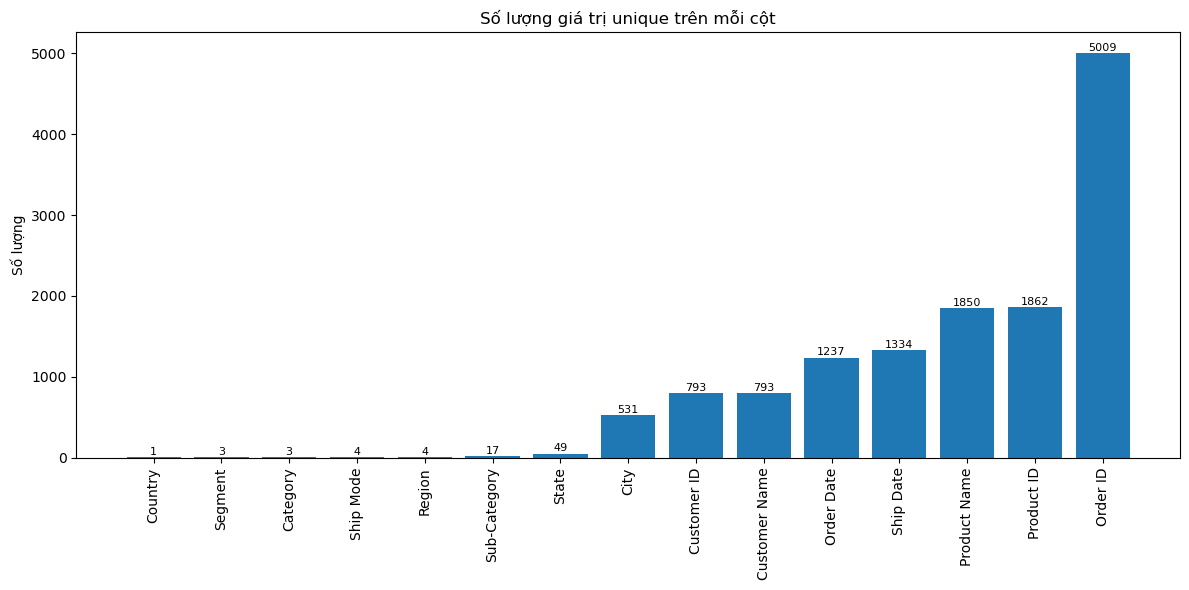

In [30]:
# 1. Dựa trên số lượng unique để xem cột nào nên loại bỏ
unique_counts = data[cat_cols].nunique().sort_values()

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột
bars = plt.bar(unique_counts.index, unique_counts.values)

# Xoay trục X để dễ đọc
plt.xticks(rotation=90)
plt.ylabel("Số lượng")
plt.title("Số lượng giá trị unique trên mỗi cột")

# --- Hiển thị số lượng unique trên từng cột ---
for i, v in enumerate(unique_counts.values):
    plt.text(
        i,               # vị trí cột
        v + 1,           # hiển thị phía trên cột
        str(v),          # giá trị
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Những cột có quá nhiều giá trị unique và không hữu ích cho mô hình ML (ví dụ: `Order ID`, `Product ID`, `Customer ID`, `Customer Name`) → Sẽ lược bỏ bớt trong Tiền xử lý dữ liệu (Data Preprocessing)
- Cột `Country` chỉ có 1 giá trị duy nhất là *'United States'* nên sẽ được loại bỏ

### Tần suất xuất hiện của 10 giá trị có số lần xuất hiện nhiều nhất của mỗi cột

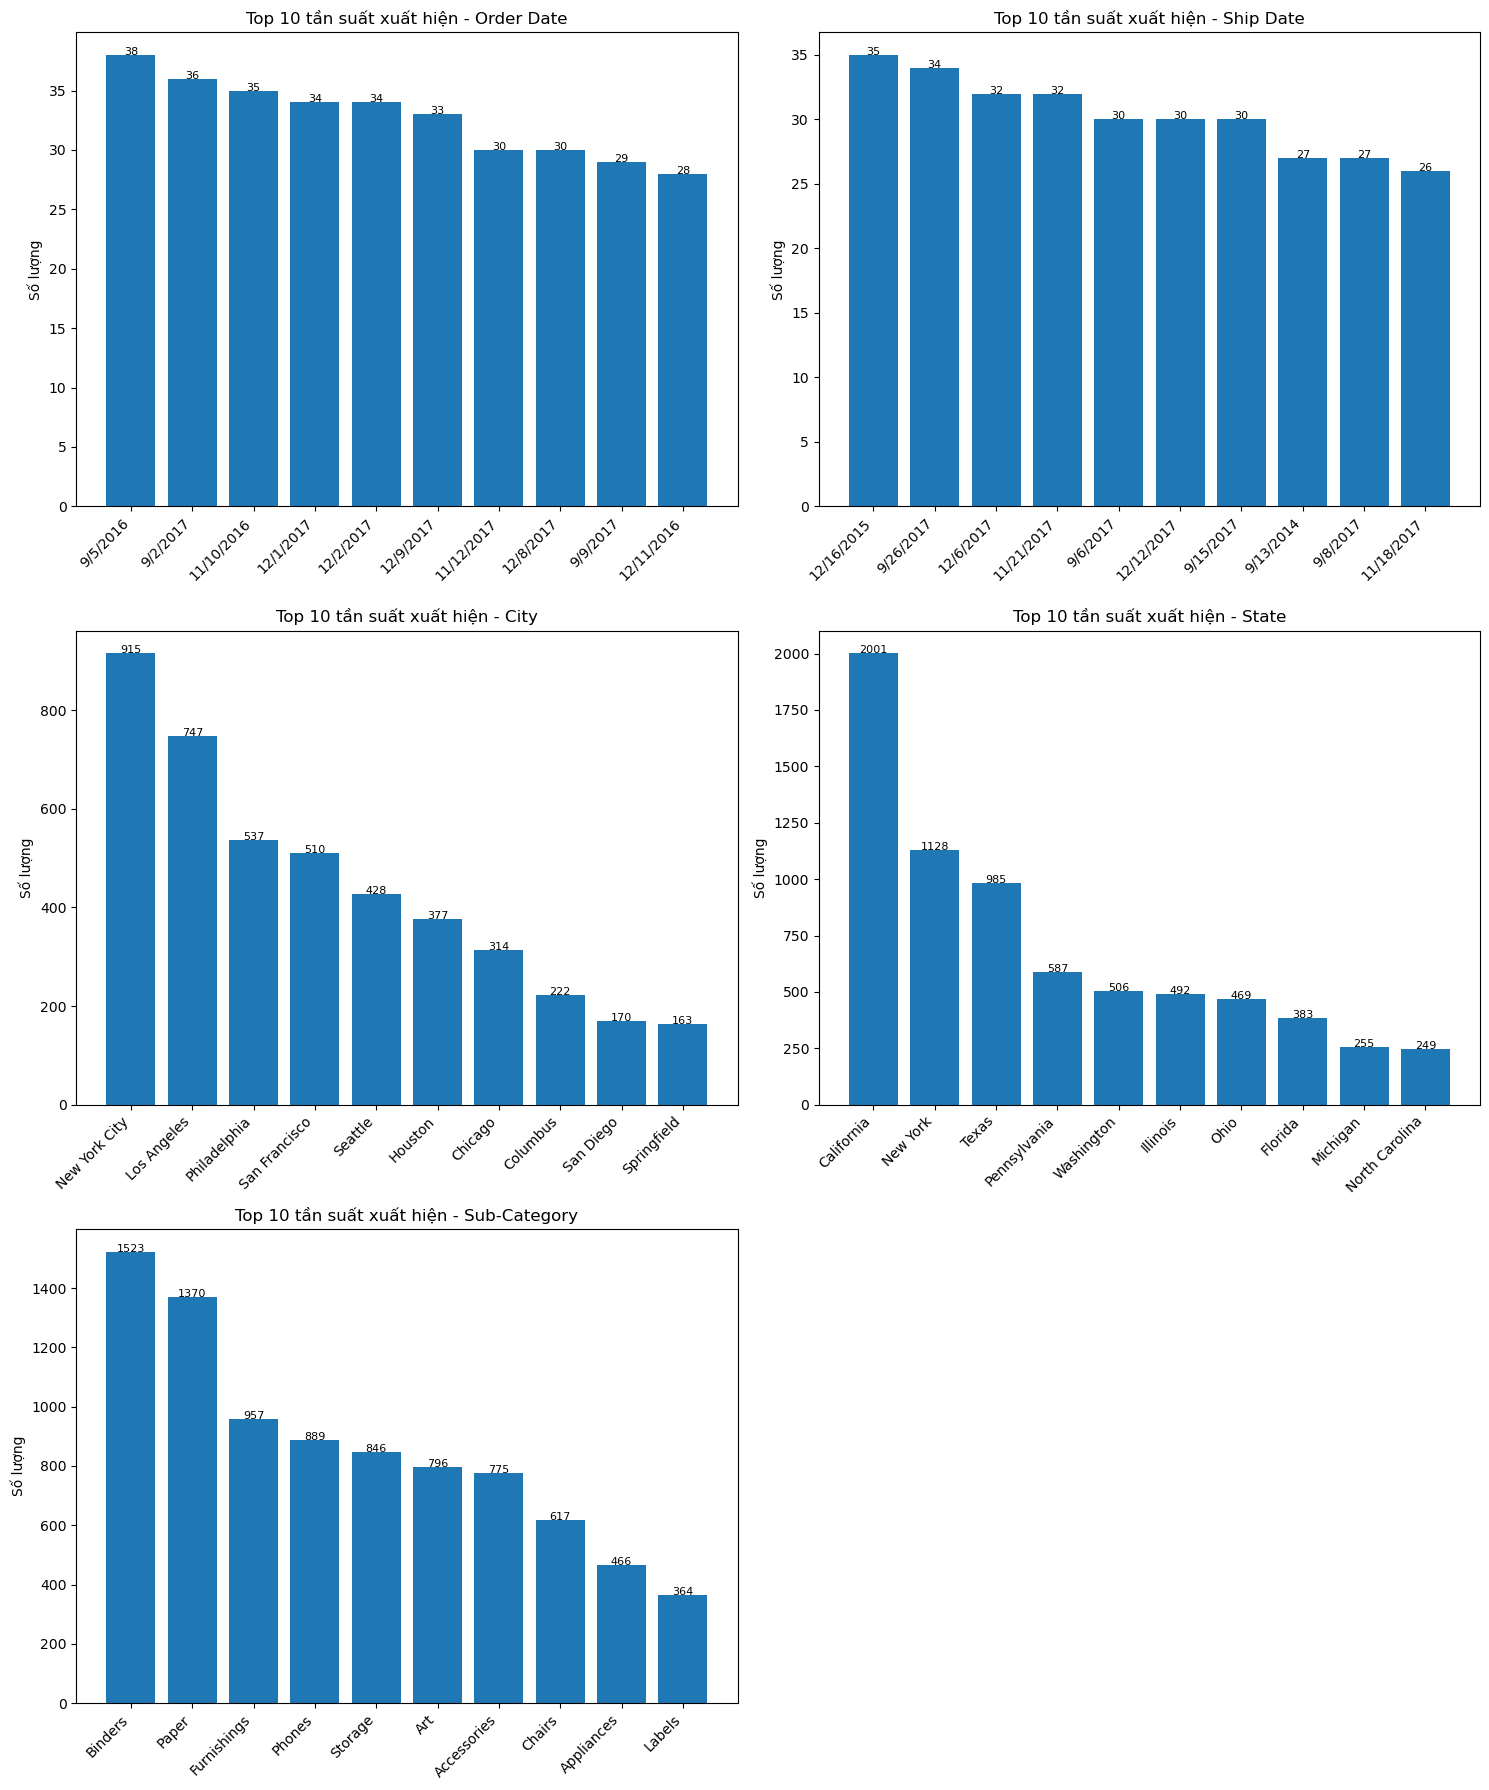

In [31]:
# 2. Barplot top 10 giá trị xuất hiện nhiều nhất của các cột quan trọng
new_cat_cols = [
    "Order Date", "Ship Date", "City", "State", "Sub-Category"
]

plt.figure(figsize=(15, 18))

for i, col in enumerate(new_cat_cols, 1):
    plt.subplot(3, 2, i)

    # Chỉ lấy TOP 10
    counts = data[col].value_counts().head(10)

    plt.bar(counts.index, counts.values)
    plt.title(f"Top 10 tần suất xuất hiện - {col}")
    plt.ylabel("Số lượng")
    plt.xticks(rotation=45, ha='right')

    # Hiển thị số trên từng cột
    for j, v in enumerate(counts.values):
        plt.text(j, v, str(v), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Trong cột `Order Date` và `Ship Date` thì đa số siêu thị có nhiều đơn hàng vào các tháng cuối năm (từ tháng 9 trở đi).
- Về `City` và `State` thì thành phố *New York* và *Los Angeles*, bang *California* cùng bang *New York* dẫn đầu về số lượng đơn hàng. 
- Về `Sub-Category` (Danh mục phụ): Chiếm đa số là *Binders* và *Paper* (ghim tài liệu và giấy).

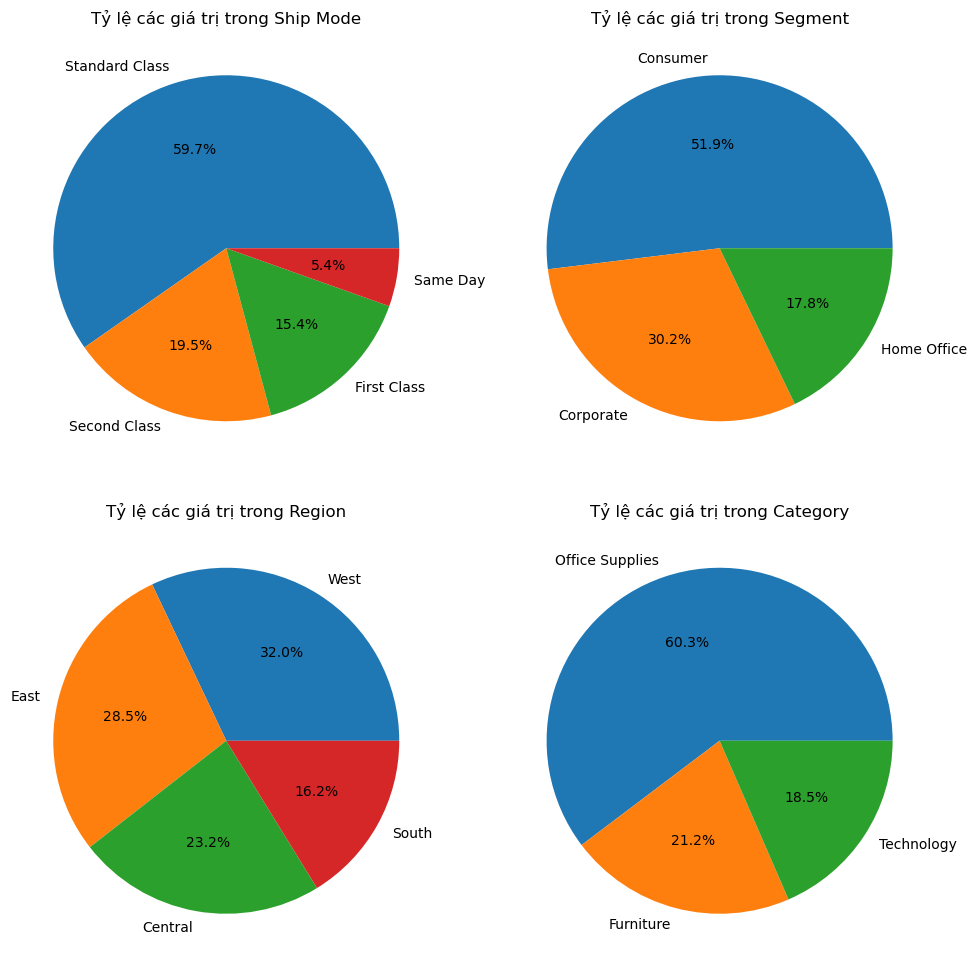

In [32]:
# 3. Biểu đồ tròn (Pie chart) cho các cột có ít category (trừ cột Country)

small_cat_cols = [c for c in cat_cols if 1 < data[c].nunique() <= 10]

# Tính số lượng biểu đồ và bố trí dạng lưới
n = len(small_cat_cols)
cols = 2 # số cột muốn hiển thị
rows = (n + cols - 1) // cols  # tự động tính số dòng

plt.figure(figsize=(5 * cols, 5 * rows))

for i, col in enumerate(small_cat_cols, 1):
    plt.subplot(rows, cols, i)
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Tỷ lệ các giá trị trong {col}")
    plt.ylabel("")

plt.tight_layout()
plt.show()

➡️ **Nhận xét**: 

- Về `Ship Mode` (Hình thức vận chuyển): *Standard Class* chiếm đa số trong cột dữ liệu này.
- Về `Segment` (Phân khúc khách hàng): Chủ yếu là *Consumer*, tiếp đến là *Corporate* và *Home Office*.
- Về `Region` (Vùng miền): Dữ liệu ở vùng phía Tây (*West*), phía Đông (*East*) và Trung tâm (*Central*) chiếm khá nhiều, còn vùng phía Nam (*South*) chiếm ít dữ liệu nhất.
- Về `Category` (Danh mục chính): Chiếm đa số là *Office supplies*, còn các sản phẩm *Furniture* và *Technology* chiếm tỷ lệ ít hơn, nhưng khá tương tự nhau.

### Kiểm tra tính hợp lệ (valid) của 2 cột `Order Date` và `Ship Date` 

In [33]:
# Convert dates
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data = data[data['Order Date'] <= data['Ship Date']]
data.shape

(9994, 21)

➡️ **Nhận xét**: 
- Do số dòng và số cột (9994 x 21) không thay đổi nên đảm bảo dữ liệu `Order Date` và `Ship Date` hợp lệ (`Order Date` không được sau `Ship Date`)

## Phân tích xử lí dữ liệu thiếu (Missing value)

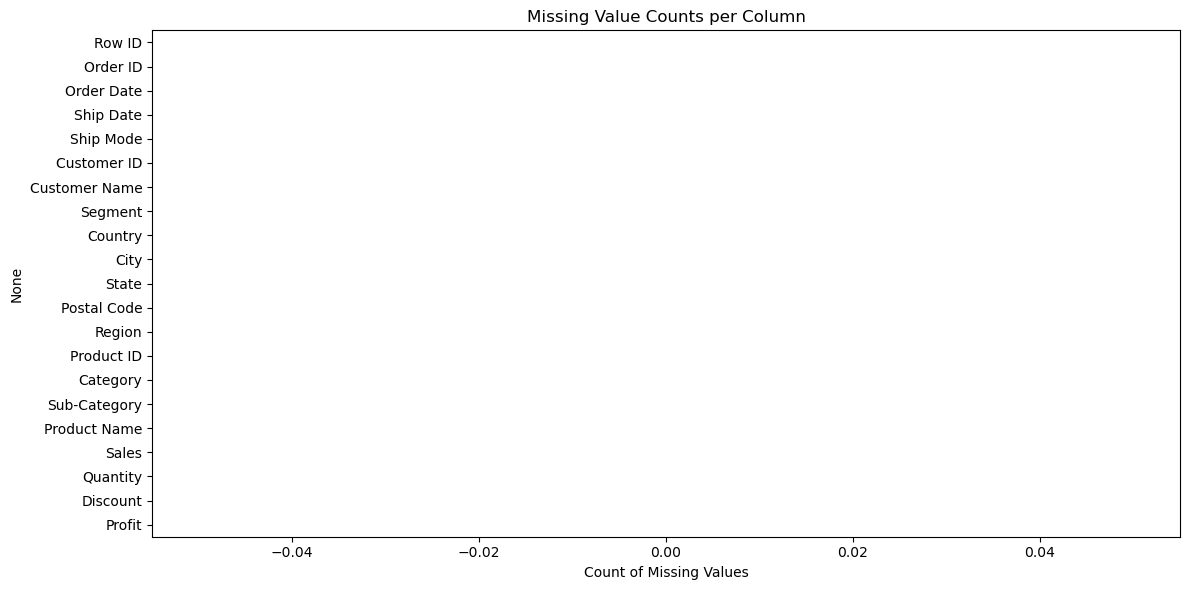

In [34]:
missing_count = data.isnull().sum()
# 2. Visualize missing data patterns
plt.figure(figsize=(12, 6))

# Bar Chart
# Since there might be 0 missing values, we plot all columns to show they are 0
sns.barplot(
    x=missing_count.values, 
    y=missing_count.index, 
    palette='viridis', 
    hue=missing_count.index, 
    legend=False        
)
plt.title('Missing Value Counts per Column')
plt.xlabel('Count of Missing Values')
plt.tight_layout()

➡️ **Nhận xét**: 

- Không tìm thấy dữ liệu bị thiếu trong bộ dữ liệu này.

## Mối quan hệ và sự tương quan giữa các cột số

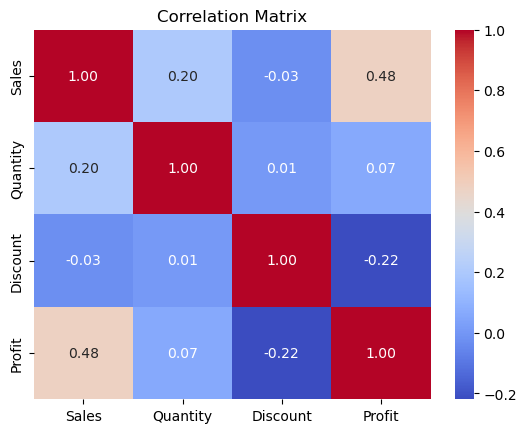

In [35]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

➡️ **Nhận xét**: 

- Nhìn chung các đặc trưng **không** có mối quan hệ tương quan mạnh mà chỉ ở mức trung bình. (cao nhất **0.48**)
    - Mối quan hệ giữa `Sales` và `Profit` (hệ số tương quan: 0.48): Khi doanh số tăng thì lợi nhuận có thể sẽ tăng theo. Điều này là hợp lý.
    
    - Mối quan hệ giữa `Discount` và `Profit` có tương quan âm (hệ số tương quan: -0.22): vì khi chính sách giảm giá càng cao thì lợi nhuận càng thấp. 

    - Tương tự với `Discount` và `Sales` (hệ số tương quan: -0.03): cho thấy chiến lược giảm giá chưa hiệu quả. Giảm giá sâu nhưng không đem lại doanh thu cao hơn.

### Cross tabulation

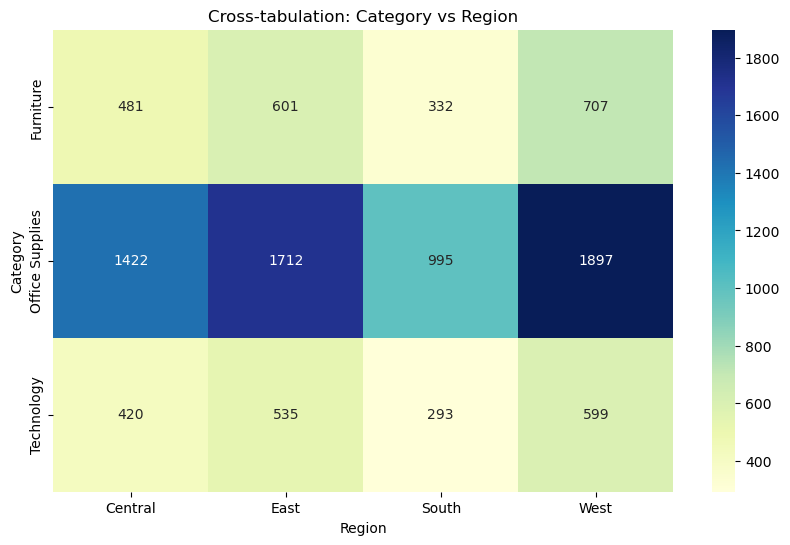

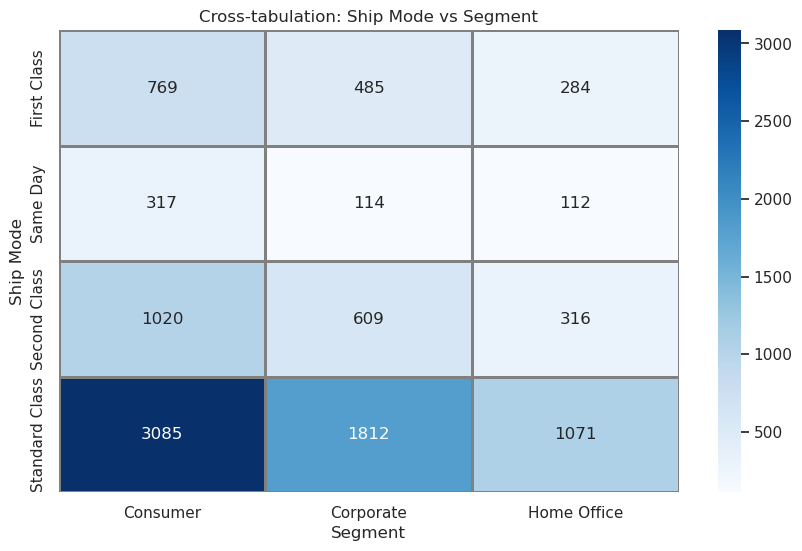

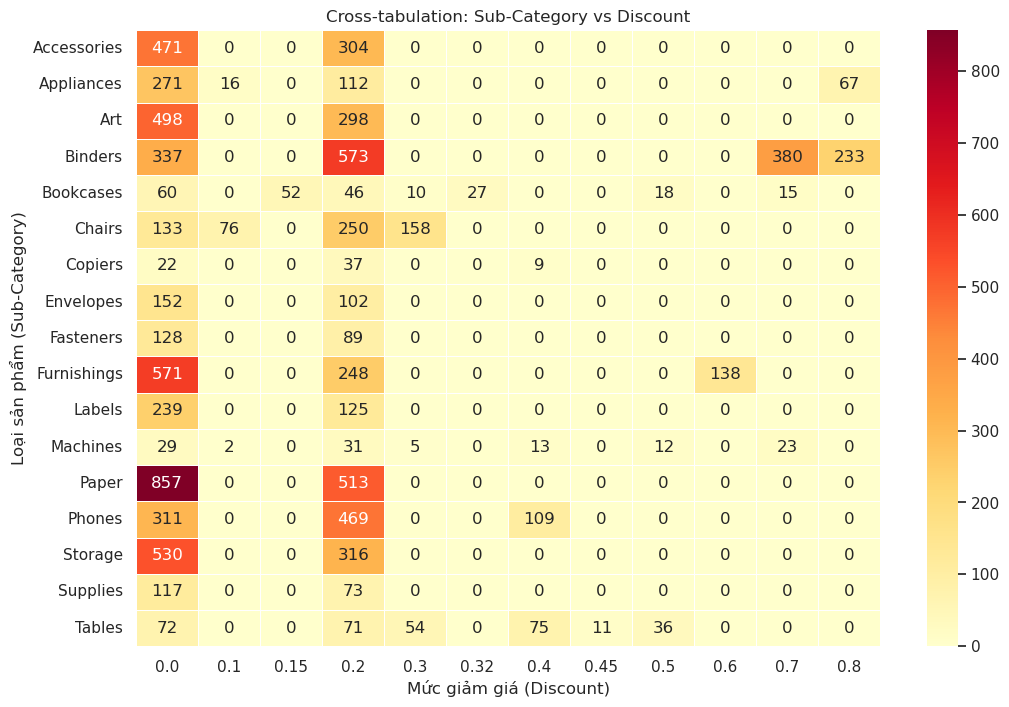

In [36]:
# Chọn 2 cột quan trọng để phân tích chéo
# Ví dụ: Xem Danh mục hàng hóa (Category) bán ra sao ở các Vùng (Region)
cat_col_1 = 'Category'  # Hoặc 'Sub-Category', 'Segment'
cat_col_2 = 'Region'    # Hoặc 'Ship Mode', 'State'

# 1. (Frequency Table)
ct_cat_reg = pd.crosstab(data[cat_col_1], data[cat_col_2])

# 2. Vẽ Heatmap cho bảng chéo (trực quan hóa tần suất)
plt.figure(figsize=(10, 6))
sns.heatmap(
    ct_cat_reg, 
    annot=True,      # Hiển thị số lượng
    fmt="d",         # Định dạng số nguyên (integer)
    cmap="YlGnBu",   # Dải màu Xanh (số càng lớn màu càng đậm)
    cbar=True        # Hiện thanh chú thích màu
)
plt.title(f"Cross-tabulation: {cat_col_1} vs {cat_col_2}")
plt.xlabel(cat_col_2)
plt.ylabel(cat_col_1)
plt.show()

# Giả sử biến 'data' là DataFrame của bạn
# Đảm bảo cấu hình hiển thị đẹp
sns.set_theme(style="whitegrid")

# --- CẶP 1: Ship Mode vs Segment ---
plt.figure(figsize=(10, 6))

# Tạo bảng chéo
ct_ship_segment = pd.crosstab(data['Ship Mode'], data['Segment'])

# Vẽ Heatmap
sns.heatmap(
    ct_ship_segment, 
    annot=True,     # Hiện số
    fmt="d",        # Định dạng số nguyên
    cmap="Blues",   # Dải màu xanh
    linewidths=1, 
    linecolor='gray'
)
plt.title("Cross-tabulation: Ship Mode vs Segment")
plt.show()

# --- CẶP 2: Sub-Category vs Discount ---
# Lưu ý: Discount là số, nhưng trong dữ liệu bán lẻ thường là các mốc cố định (0%, 10%, 20%...)
# nên ta có thể coi nó như biến phân loại để vẽ bảng chéo.

plt.figure(figsize=(12, 8))

# Tạo bảng chéo
ct_sub_discount = pd.crosstab(data['Sub-Category'], data['Discount'])

# Vẽ Heatmap
sns.heatmap(
    ct_sub_discount, 
    annot=True,      # Hiện số lượng đơn hàng tại mức giảm giá đó
    fmt="d", 
    cmap="YlOrRd",   # Dải màu Vàng-Cam-Đỏ (Càng đỏ càng nhiều đơn)
    linewidths=0.5
)
plt.title("Cross-tabulation: Sub-Category vs Discount")
plt.ylabel("Loại sản phẩm (Sub-Category)")
plt.xlabel("Mức giảm giá (Discount)")
plt.show()

➡️ **Nhận xét**:

- `Category` vs `Region`: Để xem vùng miền nào mua loại hàng nào nhiều nhất.
    - Nhìn vào dải màu xanh đậm nhất, dễ thấy **Office Supplies** là danh mục có số lượng đơn hàng lớn nhất ở tất cả các vùng (đặc biệt là vùng **West** với 1897 đơn và **East** với 1712 đơn). Đây là dòng sản phẩm "nuôi sống" bộ máy vận hành (volume driver) vì tần suất mua cao.
    - Vùng West dẫn đầu về số lượng đơn hàng ở cả 3 danh mục (Office Supplies, Furniture, Technology). Đây là thị trường quan trọng nhất cần ưu tiên chăm sóc khách hàng.
    - Vùng South là thị trường yếu nhất, cần có các thêm các biện pháp marketing cụ thể và giải quyết các nguyên nhân làm vùng này có khá ít người mua.

- `Ship Mode` vs `Segment`: Để xem nhóm khách hàng nào thích loại giao hàng nào.
    - Đa số khách hàng hay doanh nghiệp sẽ ưu tiên chọn ship tiêu chuẩn (rẻ nhất). Có thể tăng giá đôi chút để đem về lợi nhuận.
    - Loại ship `Same Day` (giao trong ngày) đáng lẽ cũng được nhiều sự lựa chọn nhưng thực tế lại khá thấp so với phần còn lại. Có thể do chi phí quá đắt.

- `Sub-Category` vs `Discount`: Để xem loại hàng nào hay bị giảm giá sâu.
    - Đa số các đơn hàng tập trung ở mức không giảm giá (0.0) hoặc giảm nhẹ 20% (0.2)
    - Bên cạnh đó có một số mặt hàng như `Binders` đều giảm ở mức 70% - 80%. Điều này có thể do hàng tồn kho muốn xả và giá trị của chúng không quá cao như `Phones` nên không lỗ quá lớn.
    - Giảm giá 20% là sự lựa chọn khá ổn cho hầu hết các mặt hàng, 20% là ổn cho các mặt hàng thiết yếu bán chạy không cần giảm quá sâu.

(-200.0, 200.0)

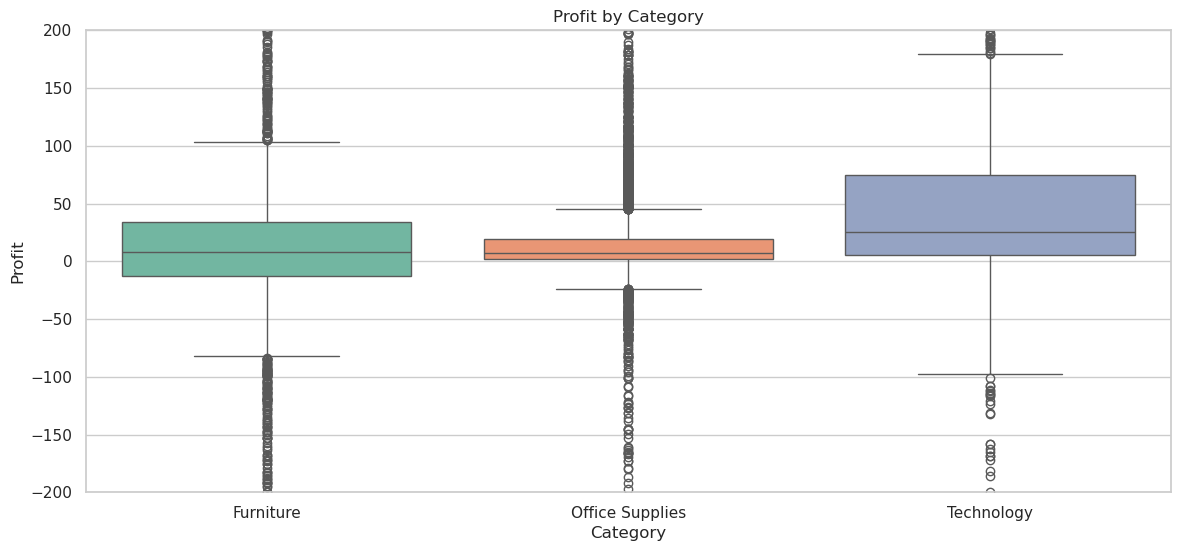

In [37]:
# Chọn cặp biến cần phân tích: Ví dụ Category (Phân loại) vs Profit & Sales (Lợi nhuận & Doanh số)
cat_col = 'Category'  # Biến phân loại
num_cols = ['Sales', 'Profit']  # Các biến số cần tính toán

# Tạo bảng thống kê mô tả
grouped_stats = data.groupby(cat_col)[num_cols].agg([
    'count',  # Số lượng đơn hàng
    'sum',    # Tổng (Tổng doanh thu/lợi nhuận)
    'mean',   # Trung bình
    'median', # Trung vị (đại diện tốt hơn nếu có nhiều ngoại lệ)
    'min',    # Thấp nhất
    'max'     # Cao nhất
])


plt.figure(figsize=(14, 6))

# --- Biểu đồ 1: Boxplot cho Lợi nhuận theo Danh mục ---
# Boxplot giúp bạn nhìn thấy các giá trị ngoại lai (những chấm đen nằm ngoài râu)
# plt.subplot(1, 2, 1)
sns.boxplot(
    x='Category', 
    y='Profit', 
    data=data, 
    palette="Set2", 
    hue='Category',
    legend=False   
)
plt.title('Profit by Category')
plt.ylim(-200, 200) # Giới hạn trục Y để nhìn rõ phần chính (vì Superstore có outlier rất lớn)

➡️ **Nhận xét**:

- Đồ dùng công nghệ `Technology` có trung vị (đường gạch ngang) cao nhất suy ra trung bình mỗi đơn hàng công nghệ mang lại lợi nhuận cao hơn hẳn so với nội thất hay văn phòng phẩm.
- Đồ hộp thị của `Office Supplies`: khoảng cách giữa các phần tư vị rất hẹp. Điều này cho thấy lợi nhuận của nhóm này cực kỳ ổn định, ít biến động, nhưng giá trị trên mỗi đơn hàng thấp.
- Mật độ các đơn hàng ở mục `Furniture` có khá nhiều ở mức (< 0). Mang lại giá trị lỗ đáng báo động kéo lợi nhuận chung đi xuống.

## Nhận xét và nhận biết về dữ liệu sau khi phân tích

### Tổng kết

- **Vấn đề về Lợi nhuận**: Có một lượng đáng kể các giao dịch bị lỗ. Cụ thể, khoảng 18.7% (1,871 trên 9,994) các đơn hàng có lợi nhuận âm. Mức lỗ cao nhất lên tới hơn $\$6,599$, trong khi lợi nhuận cao nhất là khoảng $\$8,400$.

- **Tác động của Giảm giá** (Discount): Tồn tại mối tương quan nghịch biến giữa Discount và Profit (hệ số tương quan khoảng -0.22). Dữ liệu ghi nhận các mức giảm giá rất cao, lên tới 80%. Cần xem xét kỹ xem liệu các mức giảm giá sâu này có phải là nguyên nhân chính dẫn đến việc thua lỗ hay không.

- **Phân phối Doanh số** (Sales) bị lệch: Giá trị trung bình của doanh số (mean ~ $\$230$) cao hơn nhiều so với trung vị (median ~ $\$54$). Điều này cho thấy phân phối bị lệch phải (right-skewed) rất mạnh, tức là đa số các đơn hàng có giá trị nhỏ, nhưng có một số ít đơn hàng giá trị cực lớn (lên tới **$\$22,638$**) kéo mức trung bình lên.

- **Sự thống trị của sản phẩm thuộc mục** "Office Supplies": Danh mục "Office Supplies" (Văn phòng phẩm) chiếm số lượng đơn hàng áp đảo (hơn 60% tổng số dòng), nhưng cần kiểm tra xem liệu nó có đóng góp tương xứng vào Doanh thu và Lợi nhuận so với "Technology" hay "Furniture" hay không.

- **Chênh lệch vùng miền**: Khu vực phía Tây (West) có số lượng đơn hàng cao nhất (3,203), gấp đôi so với khu vực phía Nam (South - 1,620).

- **Định dạng Mã bưu chính** (Postal Code): Cột Postal Code đang được lưu dưới dạng số nguyên (Integer). Điều này dẫn đến việc mất số 0 ở đầu đối với các mã bưu chính ở bờ Đông nước Mỹ (ví dụ: mã 01040 sẽ bị hiển thị thành 1040).

- **Kiểu dữ liệu Thời gian**: Các cột Order Date và Ship Date ban đầu được đọc là chuỗi ký tự (object/string), chưa phải định dạng thời gian (datetime) chuẩn để thực hiện phân tích chuỗi thời gian.

- **Cột dư thừa**: Cột Country chỉ chứa duy nhất một giá trị là "United States", không mang lại giá trị phân tích nào cho bộ dữ liệu này.

#### **Các bước tiền xử lý cần thiết (Preprocessing Steps)**:

- **Chuyển đổi kiểu dữ liệu**: Chuyển Order Date và Ship Date sang định dạng datetime để phân tích theo tháng/quý/năm.

- **Chuẩn hóa Mã bưu chính**: Chuyển Postal Code sang dạng chuỗi (string) và thêm số 0 vào đầu cho đủ 5 ký tự (padding) để đảm bảo tính chính xác địa lý.

- **Loại bỏ cột thừa**: Có thể xóa cột Country để làm gọn dữ liệu.

- **Kiểm tra tính nhất quán**: Rà soát các giá trị City và State để đảm bảo không có lỗi chính tả (ví dụ: "Floroide" thay vì "Florida"), dù sơ bộ chưa thấy lỗi lớn.

#### **Cờ đỏ (Red flag):**

- **Mất mát số liệu địa lý**: Việc Postal Code bị mất số 0 đầu có thể gây sai lệch nghiêm trọng nếu bạn định dùng dữ liệu này để vẽ bản đồ (Map visualization) hoặc join với các bảng dữ liệu địa lý bên ngoài mà không xử lý trước.

- **Lợi nhuận âm lớn**: Việc tồn tại các giao dịch lỗ tới hơn $6,000 là một dấu hiệu bất thường về mặt kinh doanh (business red flag). Nếu đây là lỗi nhập liệu (data entry error) thì nó sẽ làm sai lệch hoàn toàn kết quả phân tích lợi nhuận trung bình. Cần xác minh xem đây là thực tế kinh doanh (xả hàng, hàng lỗi) hay sai sót dữ liệu.

- **Thiếu dữ liệu chi phí** (Cost): Bộ dữ liệu có Sales và Profit, nhưng không có cột Cost (Chi phí vốn) hoặc Margin (Biên lợi nhuận) cụ thể cho từng sản phẩm. Chúng ta phải suy ra chi phí từ Sales và Profit, điều này hạn chế khả năng phân tích sâu về cấu trúc giá vốn.